# Lenguaje Python 3 Módulo 12
Se estudian en el módulo 12 de Python lo referente a la clasificación de datos mediante los **métodos K-medias y Clusterización Jerárquica.**

## Método K-medias
El algoritmo K-medias propuesto por MacQueen en el año 1967 es un algoritmo que permite descubrir agrupamientos en conjuntos de datos.

K-medias es un método que tiene como objetivo generar una partición de un conjunto de n observaciones en k grupos. Cada grupo está representado por el promedio de los puntos que lo componen. El representante de cada grupo se denomina centroide. La cantidad de grupos a descubrir, k, es un parámetro que se debe fijar al ajecutar el método.

El método de clasificación (clustering en inglés) comienza a partir de k centroides ubicados de forma aleatoria, y asigna cada observación al centroide más “cercano”. La forma de determinar esta “cercanía” podría depender del tipo de datos.

Es posible por ello establecer una “distancia” equivalente/adecuada en el plano o espacio (vectorial) al que pertenecen los datos. Es por ello, que a pesar de que la distancia euclidiana es por definición la que se supone, pueden determinarse métodos externos que permitan calcular una “distancia” que sea más adecuada al tipo de los datos.

Después de asignar los centroides, estos se deben ir moviendo a una ubicación que sea el promedio de todos los datos asignados a este centroide. Luego se repite el algoritmo reasignando los puntos de acuerdo a las nuevas posiciones de los centroides. Los datos no se cambian, lo que se corrige el centroide. Se busca que los datos asociados a un centroide estén lo mas cercanos a este centroide además que los grupos estén lo más separados entre ellos.

### Detalle algorítmico.

El objetivo de K-medias es agrupar a las observaciones de forma tal que todas las que se encuentren en el mismo grupo sean lo más cercanas (semejantes) entre sí y que las pertenecientes a grupos distintos sean lo más distantes (distintas) entre sí. Las medidas de distancia, como se indicó anteriormente, suele ser la euclídea, y son utilizadas para medir la distancia. Una medida para indicar cuán bien los centroides representan a los miembros de su grupo es la suma de los errores al cuadrado.

Y para ello en K-medias, cada iteración intenta reducir el valor de este error. La medida euclidiana consiste en la sumatoria de las distancias al cuadrado de cada observación con el “centroide” propuesto con respecto a determinado grupo.

El algoritmo podría dar resultados mejores en algunas “corridas” que en otras debido a la aletoriedad del inicio. Es común que los índices obtenidos para los grupos en diferentes corridas se intercambien (numéricamente) y los datos queden agrupados de la misma forma. Además el método podría no ser óptimo.

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import pandas as pd
import matplotlib.pyplot as plt
from   sklearn.decomposition import PCA
from   sklearn.datasets import make_blobs
from   sklearn.cluster import KMeans
import numpy as np
from   math import pi

import mglearn


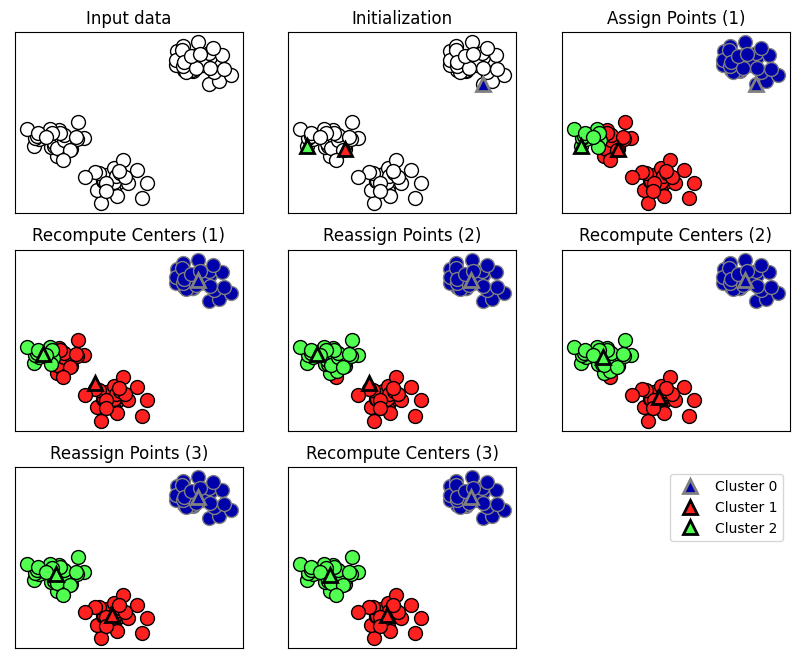

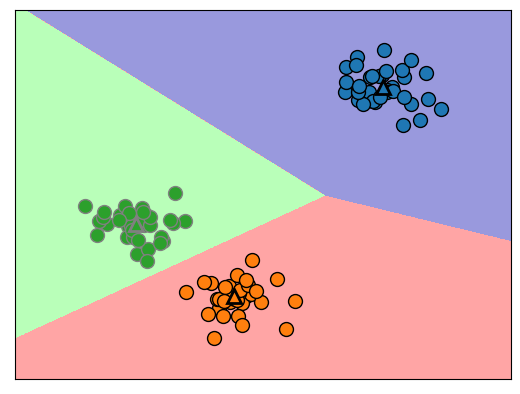

In [46]:

# Plotea un ejemplo de ejecución del algoritmo k-medias
mglearn.plots.plot_kmeans_algorithm()
plt.show()
plt.close()

# Plotea las fonteras de clases (diagrama de Voronoi)
mglearn.plots.plot_kmeans_boundaries()
plt.show()
plt.close()


### Video de Visualización
- [K-medias visualización](https://youtu.be/nXY6PxAaOk0)

In [58]:
# Un ejemplo con datos sinteticos

# Ejemplo 1. Datos simlados en 2 variables
#X, y = make_blobs(random_state=1)
#print(X[0:10]) # Datos
#print(y) # Cluster

from sklearn.datasets import make_blobs

blobs_num = 4

X, y = make_blobs(n_samples=200, centers=blobs_num, n_features=2,
                  random_state=21)
print(X.shape)

print(y)



(200, 2)
[2 2 3 1 0 1 2 2 3 3 0 0 2 0 3 3 2 0 1 0 3 2 3 0 0 2 3 2 1 2 3 3 2 2 2 1 2
 0 3 3 1 0 3 2 1 1 1 0 2 3 0 0 2 3 3 3 3 2 2 0 3 3 1 1 1 1 0 2 1 3 1 0 0 0
 3 0 3 3 0 1 0 2 2 3 3 1 2 2 2 1 2 0 2 0 3 2 1 1 1 0 0 1 0 3 1 3 1 3 2 0 0
 1 0 1 1 2 0 0 3 2 0 2 1 1 1 2 1 3 2 0 0 2 2 0 0 1 1 1 3 2 0 1 0 2 3 0 3 2
 1 1 3 0 0 2 2 1 3 1 0 1 0 2 2 0 0 0 1 3 3 1 1 3 1 3 2 1 3 3 3 3 3 2 1 3 2
 0 2 0 2 1 0 1 3 1 1 3 3 0 2 2]


KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

Text(0.5, 0, 'k')

Text(0, 0.5, 'inercias')

Text(0.5, 1.0, 'Metodo de diagrama de codo para mostrar el k optimo')

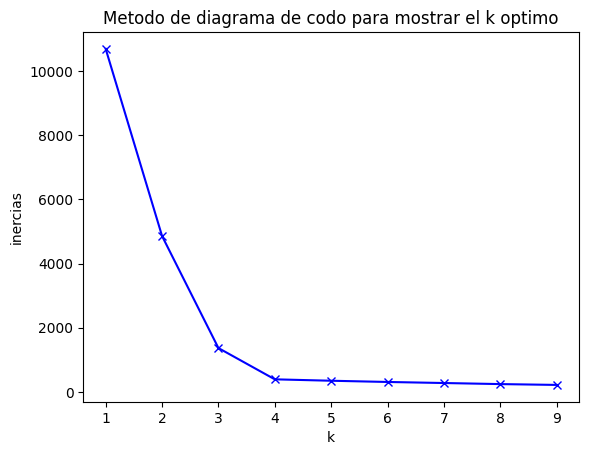

In [59]:

# Construye un modelo k-medias
# Supongamos que no sabemos cuantos clusters hay

inercias = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inercias.append(kmeanModel.inertia_)

plt.plot(K, inercias, 'bx-')
plt.xlabel('k')
plt.ylabel('inercias')
plt.title('Metodo de diagrama de codo para mostrar el k optimo')
plt.show()

# Observamos que el k optimo es = 4 cuando la inercia deja de cambiar
# significativamente


KMeans(n_clusters=4)

390.4716655660633

Cluster al que pertenece cada individuo:
[3 3 2 0 1 0 3 3 2 2 1 1 3 1 2 2 3 1 0 1 2 3 2 1 1 3 2 3 0 3 2 2 3 3 3 0 3
 1 2 2 0 1 2 3 0 0 0 1 3 2 1 1 3 2 2 2 2 3 3 1 2 2 0 0 0 0 1 3 0 2 0 1 1 1
 2 1 2 2 1 0 1 3 3 2 2 0 3 3 3 0 3 1 3 1 2 3 0 0 0 1 1 0 1 2 0 2 0 2 3 1 1
 0 1 0 0 3 1 1 2 3 1 3 0 0 0 3 0 2 3 1 1 3 3 1 1 0 0 0 2 3 1 0 1 3 2 1 2 3
 0 0 2 1 1 3 3 0 2 0 1 0 1 3 3 1 1 1 0 2 2 0 0 2 0 2 3 0 2 2 2 2 2 3 0 2 3
 1 3 1 3 0 1 0 2 0 0 2 2 1 3 3]
[3 3 2 0 1 0 3 3 2 2 1 1 3 1 2 2 3 1 0 1 2 3 2 1 1 3 2 3 0 3 2 2 3 3 3 0 3
 1 2 2 0 1 2 3 0 0 0 1 3 2 1 1 3 2 2 2 2 3 3 1 2 2 0 0 0 0 1 3 0 2 0 1 1 1
 2 1 2 2 1 0 1 3 3 2 2 0 3 3 3 0 3 1 3 1 2 3 0 0 0 1 1 0 1 2 0 2 0 2 3 1 1
 0 1 0 0 3 1 1 2 3 1 3 0 0 0 3 0 2 3 1 1 3 3 1 1 0 0 0 2 3 1 0 1 3 2 1 2 3
 0 0 2 1 1 3 3 0 2 0 1 0 1 3 3 1 1 1 0 2 2 0 0 2 0 2 3 0 2 2 2 2 2 3 0 2 3
 1 3 1 3 0 1 0 2 0 0 2 2 1 3 3]


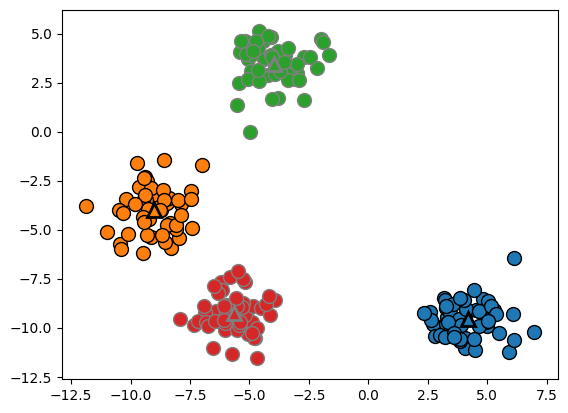

In [62]:
# k optimo es blobs_num como era de esperar
clusters_num = 4
kmeans = KMeans(n_clusters=clusters_num)
kmeans.fit(X)

kmeans.inertia_

# Cluster al que pertenece al que asigna k-medias (dos formas de hacerlo)
print("Cluster al que pertenece cada individuo:\n{}".format(kmeans.labels_))
print(kmeans.predict(X))


# Plotea el resultado
# Es posible directamente porque solo hay dos variables
null=mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
null=mglearn.discrete_scatter(  kmeans.cluster_centers_[:, 0], 
                           kmeans.cluster_centers_[:, 1], 
                           list(range(0,clusters_num)),
                           markers='^', markeredgewidth=2)
plt.show()
plt.close()


In [63]:

print(os.getcwd())
datos = pd.read_csv('../Datos/EjemploEstudiantes.csv',delimiter=';',decimal=",",index_col=0)
print(datos)
print(datos.head())
print(datos.shape)


d:\Documents\UCR\IE-0217 Estructura de Datos y Algorithmos para Ingenieria\Modules\Semana14\Clase28\MaterialClase\src\pyModulo12
        Matematicas  Ciencias  Espanol  Historia  EdFisica
Lucia           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Ines            7.6       9.2      8.0       8.0       7.5
Luis            5.0       6.5      6.5       7.0       9.0
Andres          6.0       6.0      7.8       8.9       7.3
Ana             7.8       9.6      7.7       8.0       6.5
Carlos          6.3       6.4      8.2       9.0       7.2
Jose            7.9       9.7      7.5       8.0       6.0
Sonia           6.0       6.0      6.5       5.5       8.7
Maria           6.8       7.2      8.7       9.0       7.0
        Matematicas  Ciencias  Espanol  Historia  EdFisica
Lucia           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Ines            7.6       9.2      8.0       

In [64]:

# Ejecuta k-medias con 3 clusters
kmedias = KMeans(n_clusters=3)
kmedias.fit(datos)
print(kmedias.predict(datos))
centros = np.array(kmedias.cluster_centers_)
print(centros)


KMeans(n_clusters=3)

[1 0 0 2 1 0 1 0 2 1]
[[7.7   9.475 7.625 7.75  6.75 ]
 [6.525 6.525 8.475 8.875 7.375]
 [5.5   6.25  6.5   6.25  8.85 ]]


[[7.7   9.475 7.625 7.75  6.75 ]]
[7.7, 9.475, 7.625, 7.75, 6.75]
5
range(0, 5)


<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x1bd2151ad10>,
 [Text(0, 0, 'Matematicas'),
  Text(1, 0, 'Ciencias'),
  Text(2, 0, 'Espanol'),
  Text(3, 0, 'Historia'),
  Text(4, 0, 'EdFisica')])

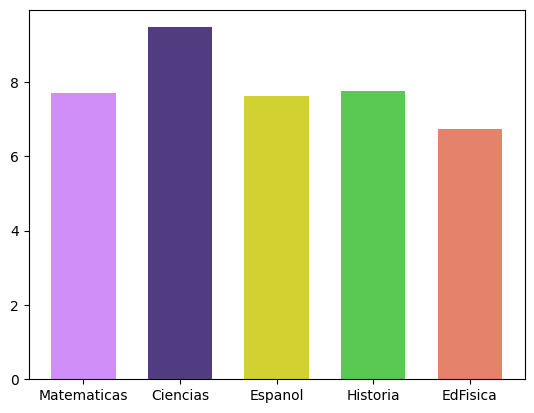

In [65]:

# Plotea Centro 1
c1 = centros[:1, :]
print(c1)

y=c1.tolist()[0]
print(y)

N = len(y)
print(N)

x = range(N)
print(x)

width = 1/1.5
colores_1 = ['#CF8EF8', '#523C81', '#D2D132', '#59C951', '#E5826C']
plt.bar(x, y, width, color=colores_1)
plt.xticks(range(datos.shape[1]), datos.columns)
plt.show()
plt.close()


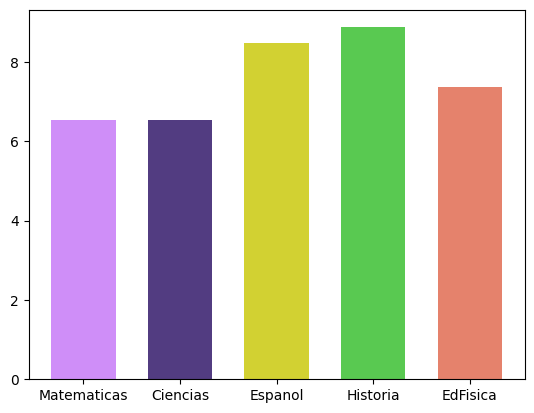

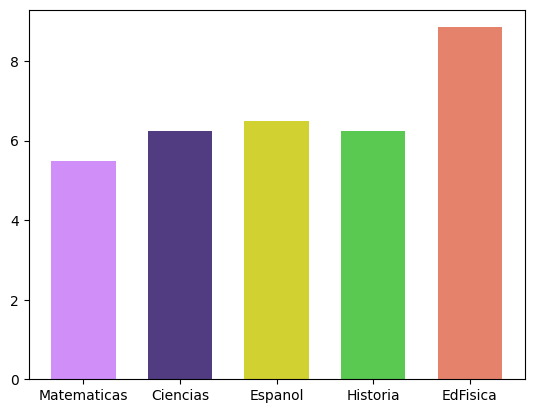

In [66]:

# Plotea Centro 2
c2 = centros[1:2, :]
y=c2.tolist()[0]
N = len(y)
x = range(N)
width = 1/1.5
null=plt.bar(x, y, width, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
plt.show()
plt.close()

# Plotea Centro 3
c3 = centros[2:3, :]
y=c3.tolist()[0]
N = len(y)
x = range(N)
width = 1/1.5
null=plt.bar(x, y, width, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
plt.show()
plt.close()


<Figure size 1800x800 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

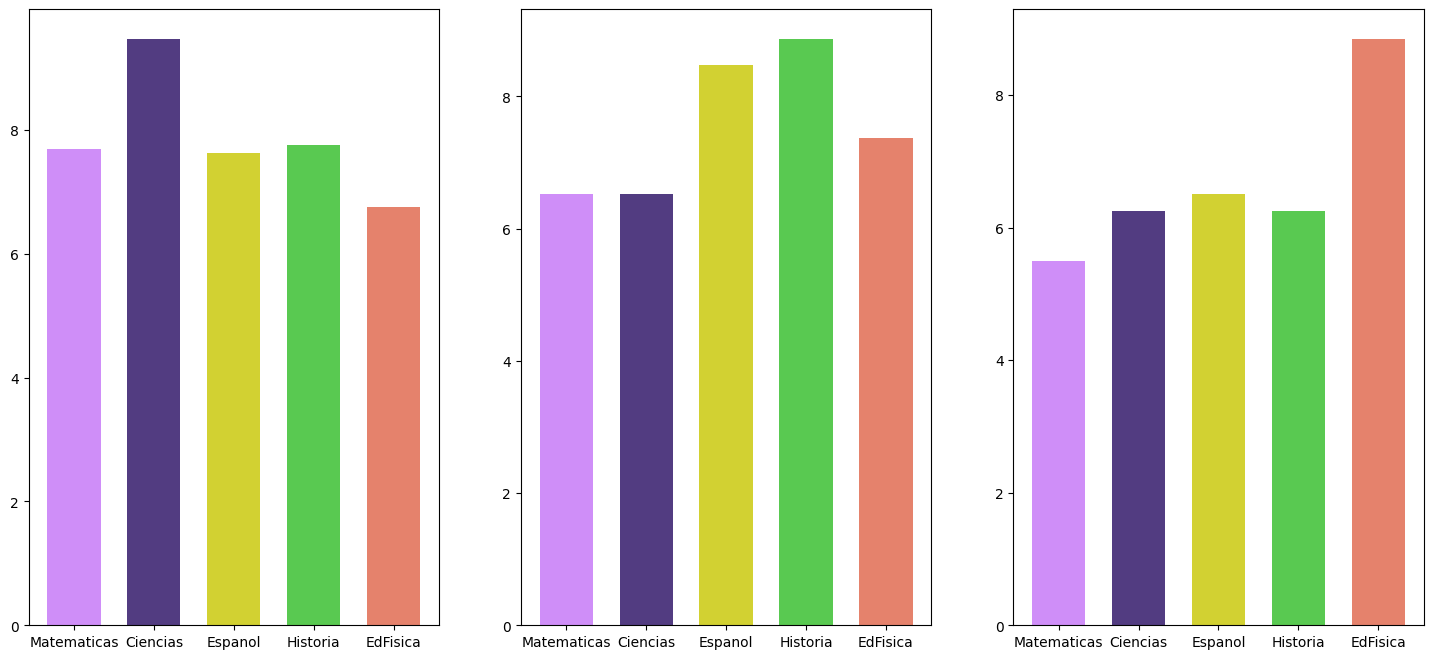

In [67]:

# LOS TRES JUNTOS
colores_1 = ['#CF8EF8', '#523C81', '#D2D132', '#59C951', '#E5826C']
plt.figure(1,figsize=(18,8))
# Plotea Centro 1
plt.subplot(1, 3, 1)
y  = centros[:1, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)

# Plotea Centro 2
plt.subplot(1, 3, 2)
y= centros[1:2, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)

# Plotea Centro 3
plt.subplot(1, 3, 3)
y = centros[2:3, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)

#Todos juntos
plt.show()
plt.close()


In [68]:

# RADAR PLOT para interpretar
# ===========================

datos


,Matematicas,Ciencias,Espanol,Historia,EdFisica
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
Maria,6.8,7.2,8.7,9.0,7.0


In [69]:
centros

array([[7.7  , 9.475, 7.625, 7.75 , 6.75 ],
       [6.525, 6.525, 8.475, 8.875, 7.375],
       [5.5  , 6.25 , 6.5  , 6.25 , 8.85 ]])

In [70]:
centros_trans = centros.T
centros_trans


array([[7.7  , 6.525, 5.5  ],
       [9.475, 6.525, 6.25 ],
       [7.625, 8.475, 6.5  ],
       [7.75 , 8.875, 6.25 ],
       [6.75 , 7.375, 8.85 ]])

In [71]:
V1 = centros_trans[:1,:]
print(V1)

V1=V1.tolist()[0]
print(V1)

V2 = centros_trans[1:2,:]
print(V2)

V2=V2.tolist()[0]
print(V2)

V3 = centros_trans[2:3,:]
print(V3)

V3=V3.tolist()[0]
print(V3)

V4 = centros_trans[3:4,:]
print(V4)

V4=V4.tolist()[0]
print(V4)

V5 = centros_trans[4:5,:]
print(V5)

V5=V5.tolist()[0]
print(V5)

[[7.7   6.525 5.5  ]]
[7.7, 6.525, 5.5]
[[9.475 6.525 6.25 ]]
[9.475, 6.525, 6.25]
[[7.625 8.475 6.5  ]]
[7.625, 8.475, 6.5]
[[7.75  8.875 6.25 ]]
[7.75, 8.875, 6.25]
[[6.75  7.375 8.85 ]]
[6.75, 7.375, 8.85]


In [72]:

# Datos para el Radar Plot
df = pd.DataFrame({
'grupo': ['Cluster-1','Cluster-2','Cluster-3'],
'Matematicas': V1,
'Ciencias': V2,
'Espanol': V3,
'Historia': V4,
'EdFisica': V5
})

df


,grupo,Matematicas,Ciencias,Espanol,Historia,EdFisica
0,Cluster-1,7.700,9.475,7.625,7.750,6.750
1,Cluster-2,6.525,6.525,8.475,8.875,7.375
2,Cluster-3,5.500,6.250,6.500,6.250,8.850


In [73]:
#Otra forma de hacer lo mismo:
df = pd.DataFrame()
for i in range(datos.shape[1]):
    df = pd.concat([df,pd.DataFrame({datos.columns[i]:centros_trans[i,:].tolist()})],axis = 1)

df =  pd.concat([df,pd.DataFrame({'grupo': ['Cluster-1','Cluster-2','Cluster-3']})],axis = 1)

df


,Matematicas,Ciencias,Espanol,Historia,EdFisica,grupo
0,7.700,9.475,7.625,7.750,6.750,Cluster-1
1,6.525,6.525,8.475,8.875,7.375,Cluster-2
2,5.500,6.250,6.500,6.250,8.850,Cluster-3


In [74]:
# Variables y Número de Variables
variables=list(df)[0:5]
print(variables)

N = len(variables)
print(N)


['Matematicas', 'Ciencias', 'Espanol', 'Historia', 'EdFisica']
5


In [75]:
# Ángulo de los ejes 
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos+= angulos[:1]

angulos


[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

(0.0, 10.0)

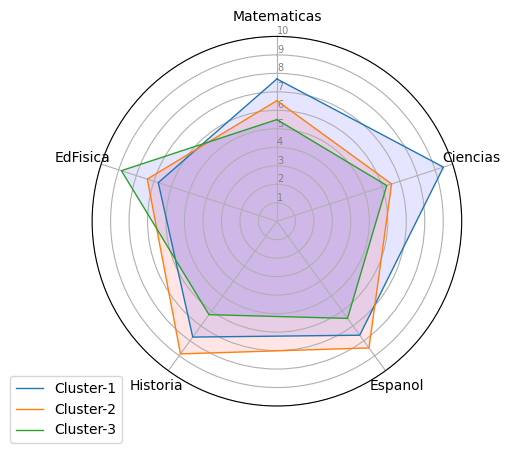

In [76]:

# Inicializa el Radar
ax = plt.subplot(111, polar=True)
 
# En primer eje en la parte de arriba
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Dibuja los ejes por variables + las etiquetas
null=plt.xticks(angulos[:-1], variables)
 
# Dibuja las etiquetas en Y
ax.set_rlabel_position(0)
null=plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="grey", size=7)
plt.ylim(0,10)

# Plotea cada cluster (grupo) = una línea de datos
 
# Cluster 1
valores=df.loc[0].drop('grupo').values.tolist()

valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-1")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Cluster 2
valores=df.loc[1].drop('grupo').values.tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-2")
ax.fill(angulos, valores, 'r', alpha=0.1)
 
# Cluster 3
valores=df.loc[2].drop('grupo').values.tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-3")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Agrega la leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
plt.close()


array([[-0.76471745, -1.5817637 ],
       [ 1.66887794,  1.39196556],
       [ 1.57822841,  0.29949595],
       [-2.60701317,  1.32020402],
       [-1.43877557, -1.33566867],
       [ 2.34790534,  0.3880845 ],
       [-0.89372557, -1.51890124],
       [ 2.64984571,  0.4254636 ],
       [-2.62959083,  2.18339513],
       [ 0.08896518, -1.57227516]])

(10, 5)
(10, 2)


Text(0.5, 0, 'componente 1')

Text(0, 0.5, 'componente 2')

Text(0.5, 1.0, '3 Cluster K-Medias')

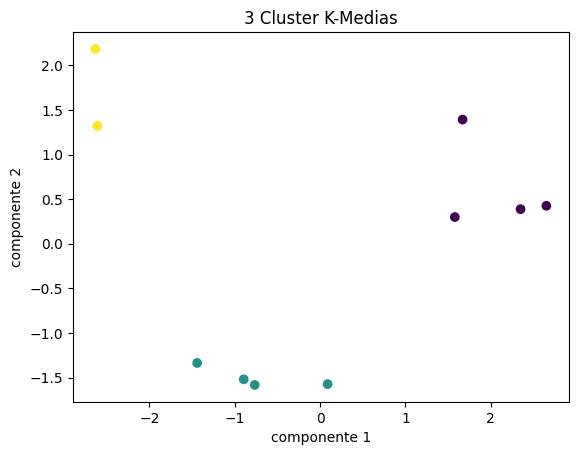

In [77]:


# Los dibuja sobre el plano principal los clusters de k-medias
pca = PCA(n_components=2)
componentes = pca.fit_transform(datos)
componentes
print(datos.shape)
print(componentes.shape)
plt.scatter(componentes[:, 0], componentes[:, 1],c=kmedias.predict(datos))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('3 Cluster K-Medias')
plt.show()
plt.close()


     s.largo  s.ancho  p.largo  p.ancho       tipo
0        5.1      3.5      1.4      0.2     setosa
1        4.9      3.0      1.4      0.2     setosa
2        4.7      3.2      1.3      0.2     setosa
3        4.6      3.1      1.5      0.2     setosa
4        5.0      3.6      1.4      0.2     setosa
..       ...      ...      ...      ...        ...
145      6.7      3.0      5.2      2.3  virginica
146      6.3      2.5      5.0      1.9  virginica
147      6.5      3.0      5.2      2.0  virginica
148      6.2      3.4      5.4      2.3  virginica
149      5.9      3.0      5.1      1.8  virginica

[150 rows x 5 columns]


,s.largo,s.ancho,p.largo,p.ancho,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)

,s.largo,s.ancho,p.largo,p.ancho
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


KMeans(n_clusters=3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]]
(150, 5)
(1

Text(0.5, 0, 'componente 1')

Text(0, 0.5, 'componente 2')

Text(0.5, 1.0, '3 Cluster K-Medias')

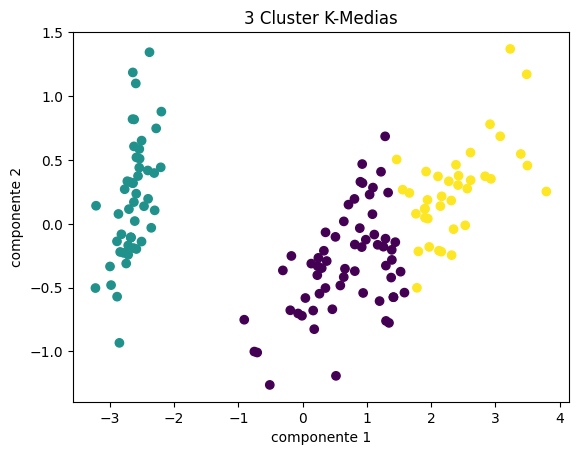

In [84]:

# Ejemplo 3. Datos de Iris
iris = pd.read_csv('../Datos/iris.csv',delimiter=';',decimal=".")
print(iris)
iris.head()
iris.shape

# Ejecuta k-medias con 3 clusters
kmedias = KMeans(n_clusters=3)
iris_tempo=iris.iloc[:,:4]
iris_tempo
kmedias.fit(iris_tempo)
print(kmedias.predict(iris_tempo))
centros = np.array(kmedias.cluster_centers_)
print(centros) 

# Los dibuja sobre el plano principal
pca = PCA(n_components=2)
componentes = pca.fit_transform(iris_tempo)
print(componentes[0:20])

print(iris.shape)
print(componentes.shape)
# Gráfico
plt.scatter(componentes[:, 0], componentes[:, 1],c=kmedias.predict(iris_tempo))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('3 Cluster K-Medias')
plt.show()


<Figure size 1800x800 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

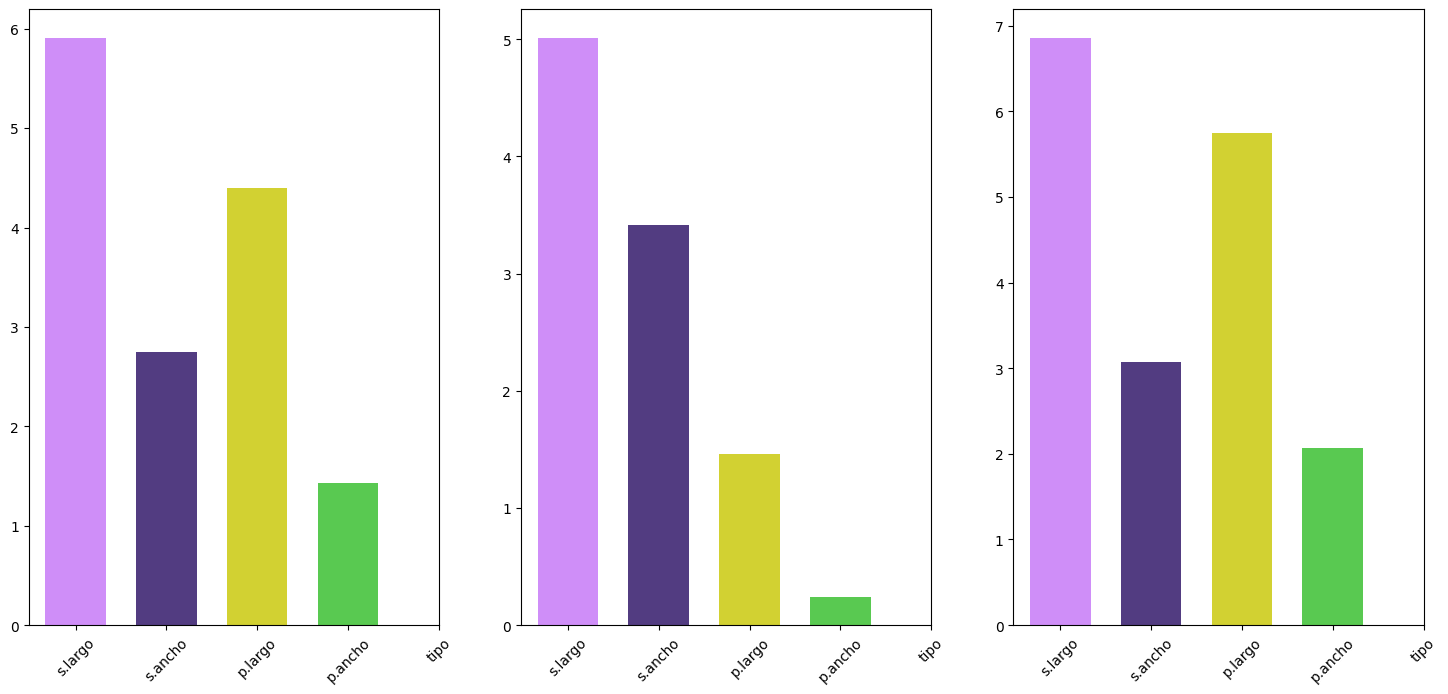

In [85]:

# Graficos de barras de los clusters
colores_1 = ['#CF8EF8', '#523C81', '#D2D132', '#59C951', '#E5826C']
plt.figure(1,figsize=(18,8))
# Plotea Centro 1
plt.subplot(1, 3, 1)
y  = centros[:1, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(iris.shape[1]), iris.columns,rotation=45)
# Plotea Centro 2
plt.subplot(1, 3, 2)
y= centros[1:2, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(iris.shape[1]), iris.columns,rotation=45)
# Plotea Centro 3
plt.subplot(1, 3, 3)
y = centros[2:3, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(iris.shape[1]), iris.columns,rotation=45)
plt.show()
plt.close()


In [86]:
iris['tipo']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: tipo, Length: 150, dtype: object

   s.largo  s.ancho  p.largo  p.ancho   tipo      grupo
0    7.700    9.475    7.625    7.750  6.750  Cluster-1
1    6.525    6.525    8.475    8.875  7.375  Cluster-2
2    5.500    6.250    6.500    6.250  8.850  Cluster-3


['s.largo', 's.ancho', 'p.largo', 'p.ancho', 'tipo']

5


(0.0, 10.0)

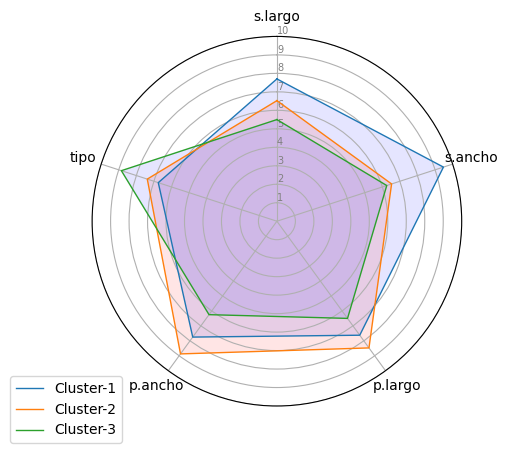

In [87]:
# RADAR PLOT para interpretar
# ===========================

df = pd.DataFrame()
for i in range(iris.shape[1]):
    df = pd.concat([df,pd.DataFrame({iris.columns[i]:centros_trans[i,:].tolist()})],axis = 1)

df =  pd.concat([df,pd.DataFrame({'grupo': ['Cluster-1','Cluster-2','Cluster-3']})],axis = 1)
print(df)

# Variables y Número de Variables
variables=list(df)[0:5]
variables
N = len(variables)
print(N)
 
# Ángulo de los ejes 
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos+= angulos[:1]
 
# Inicializa el Radar
ax = plt.subplot(111, polar=True)
 
# En primer eje en la parte de arriba
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Dibuja los ejes por variables + las etiquetas
null=plt.xticks(angulos[:-1], variables,rotation=45)
 
# Dibuja las etiquetas en Y
ax.set_rlabel_position(0)
null=plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="grey", size=7)
plt.ylim(0,10)
 
# Plotea cada cluster (grupo) = una línea de datos
 
# Cluster 1
valores=df.loc[0].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-1")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Cluster 2
valores=df.loc[1].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-2")
ax.fill(angulos, valores, 'r', alpha=0.1)
 
# Cluster 3
valores=df.loc[2].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-3")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Agrega la leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
plt.close()


In [88]:

# Ejemplo 4. Ejemplo con datos Servicio al Cliente
print(os.getcwd())
datos = pd.read_csv('../Datos/EjemploClientesCorregidaEdad.csv',delimiter=';',decimal=",",index_col=0)
print(datos)
datos.head()
datos.shape
datos.dropna().describe()


d:\Documents\UCR\IE-0217 Estructura de Datos y Algorithmos para Ingenieria\Modules\Semana14\Clase28\MaterialClase\src\pyModulo12
                Edad/10  Antiguedad  Espacios Parqueo  Velocidad Cajas  \
Nombre Cliente                                                           
 Ariana             2.5           1               7.6              7.6   
 Guiselle           2.4           0               4.8              9.0   
 Francisco          2.8           7               6.8              8.4   
 Griselda           2.3           0               3.4              7.8   
 Damaris            4.9           6               7.0              3.2   
 Johana             3.2           4               5.6              7.8   
 Bernal             2.6           0               6.2              8.0   
 Freddy             2.3           4               5.6              6.8   
 Estafania          2.5           4               4.6              8.0   
 Laura              2.9           0               5.4    

,Edad/10,Antiguedad,Espacios Parqueo,Velocidad Cajas,Distribucion Productos,Atencion Empleados,Calidad Instalaciones,Ubicacion,Limpieza,Variedad Productos,Prestigio Empresa,Calidad Servicio
Nombre Cliente,,,,,,,,,,,,
Ariana,2.5,1,7.6,7.6,7.8,9.7,5.0,9.0,7.6,5.6,7.0,6.6
Guiselle,2.4,0,4.8,9.0,7.2,10.0,2.0,9.6,6.8,8.4,9.8,5.4
Francisco,2.8,7,6.8,8.4,7.6,8.7,2.7,9.2,6.2,9.0,9.6,8.5
Griselda,2.3,0,3.4,7.8,9.0,10.0,1.0,10.0,4.4,4.0,2.8,5.4
Damaris,4.9,6,7.0,3.2,1.2,10.0,4.0,9.0,1.4,4.8,2.6,3.3


(37, 12)

,Edad/10,Antiguedad,Espacios Parqueo,Velocidad Cajas,Distribucion Productos,Atencion Empleados,Calidad Instalaciones,Ubicacion,Limpieza,Variedad Productos,Prestigio Empresa,Calidad Servicio
count,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2.881081,3.27027,6.118919,7.897297,6.535135,9.643243,3.381081,9.000000,6.686486,6.848649,7.075676,5.108108
std,0.707436,2.83479,1.201351,1.197796,2.169513,0.514534,1.613801,0.916515,1.626544,1.384361,1.920851,1.816648
min,1.900000,0.00000,3.400000,3.200000,1.200000,7.700000,0.700000,6.800000,1.400000,4.000000,2.600000,1.500000
25%,2.400000,1.00000,5.600000,7.600000,5.000000,9.300000,2.300000,8.600000,6.000000,6.200000,5.800000,3.900000
50%,2.700000,4.00000,6.200000,7.800000,7.200000,10.000000,3.300000,9.200000,6.800000,6.600000,7.400000,5.400000
75%,3.200000,5.00000,6.800000,8.600000,8.200000,10.000000,5.000000,9.600000,7.800000,7.600000,8.400000,6.500000
max,4.900000,13.00000,8.000000,9.600000,9.600000,10.000000,6.700000,10.000000,9.600000,9.400000,9.800000,8.800000


KMeans(n_clusters=3)

[2 2 0 1 1 1 2 0 1 2 0 0 2 0 0 1 0 2 2 1 0 1 2 1 1 0 1 2 2 0 2 0 2 1 1 2 2]


array([[3.11818182, 6.18181818, 6.52727273, 8.01818182, 6.92727273,
        9.55454545, 3.84545455, 8.50909091, 6.81818182, 7.2       ,
        7.61818182, 4.78181818],
       [3.15      , 2.91666667, 5.31666667, 7.61666667, 4.56666667,
        9.66666667, 2.2       , 9.13333333, 5.41666667, 5.6       ,
        4.9       , 5.10833333],
       [2.46428571, 1.28571429, 6.48571429, 8.04285714, 7.91428571,
        9.69285714, 4.02857143, 9.27142857, 7.67142857, 7.64285714,
        8.51428571, 5.36428571]])

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

Text(0.5, 0, 'k= numero de clusters')

Text(0, 0.5, 'inercias o suma de distancias cuadradas a centros de clusters')

Text(0.5, 1.0, 'Metodo de diagrama de codo para mostrar el k optimo')

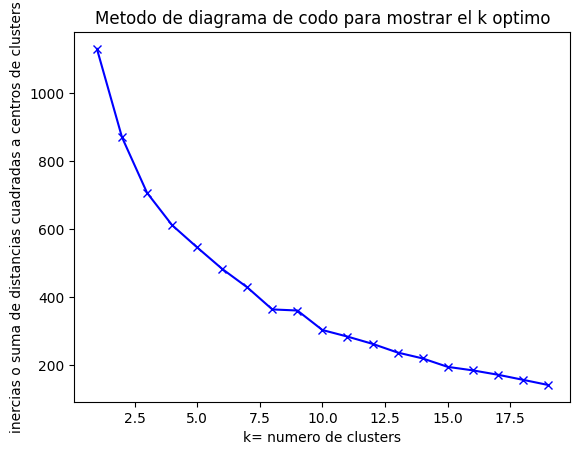

In [96]:

# Ejecuta k-medias con 3 clusters
kmedias = KMeans(n_clusters=3)
kmedias.fit(datos)
print(kmedias.predict(datos))
centros = np.array(kmedias.cluster_centers_)
centros

# diagrama de codo
inercias = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(datos)
    inercias.append(kmeanModel.inertia_)

plt.plot(K, inercias, 'bx-')
plt.xlabel('k= numero de clusters')
plt.ylabel('inercias o suma de distancias cuadradas a centros de clusters')
plt.title('Metodo de diagrama de codo para mostrar el k optimo')
plt.show()



<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

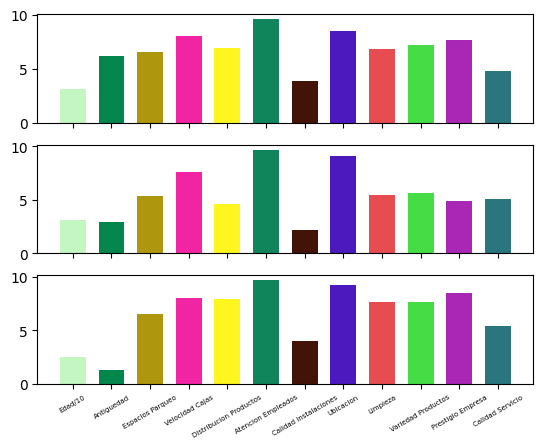

In [97]:
# En este caso no hay mucha claridad, K=3 o K=7 son buenas opciones

# LOS TRES JUNTOS
colores_1 = ['#C4F6C2','#03864B', '#AF960F','#F124A3','#FEF61E','#10855C',
             '#441308','#4C19BE','#E74D50','#45DC46','#AA27B6','#2B757E']

#plt.figure(1,figsize=(26,20))
# Plotea Centro 1
plt.subplot(3, 1, 1)
y  = centros[:1, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
null =plt.tick_params(labelbottom=False)   
# Plotea Centro 2
plt.subplot(3, 1, 2)
y= centros[1:2, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
null =plt.tick_params(labelbottom=False)
# Plotea Centro 3
plt.subplot(3, 1, 3)
y = centros[2:3, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns,rotation=30,fontsize=5)
plt.show()


,Edad/10,Antiguedad,Espacios Parqueo,Velocidad Cajas,Distribucion Productos,Atencion Empleados,Calidad Instalaciones,Ubicacion,Limpieza,Variedad Productos,Prestigio Empresa,Calidad Servicio
Nombre Cliente,,,,,,,,,,,,
Ariana,2.5,1,7.6,7.6,7.8,9.7,5.0,9.0,7.6,5.6,7.0,6.6
Guiselle,2.4,0,4.8,9.0,7.2,10.0,2.0,9.6,6.8,8.4,9.8,5.4
Francisco,2.8,7,6.8,8.4,7.6,8.7,2.7,9.2,6.2,9.0,9.6,8.5
Griselda,2.3,0,3.4,7.8,9.0,10.0,1.0,10.0,4.4,4.0,2.8,5.4
Damaris,4.9,6,7.0,3.2,1.2,10.0,4.0,9.0,1.4,4.8,2.6,3.3
Johana,3.2,4,5.6,7.8,6.8,10.0,3.0,10.0,5.0,4.2,4.2,7.2
Bernal,2.6,0,6.2,8.0,6.6,9.3,3.3,8.6,7.8,6.4,9.6,6.5
Freddy,2.3,4,5.6,6.8,6.2,9.7,4.0,6.8,6.8,7.4,5.6,4.5
Estafania,2.5,4,4.6,8.0,3.8,10.0,1.7,9.8,5.0,4.4,6.0,7.6


array([[3.11818182, 6.18181818, 6.52727273, 8.01818182, 6.92727273,
        9.55454545, 3.84545455, 8.50909091, 6.81818182, 7.2       ,
        7.61818182, 4.78181818],
       [3.15      , 2.91666667, 5.31666667, 7.61666667, 4.56666667,
        9.66666667, 2.2       , 9.13333333, 5.41666667, 5.6       ,
        4.9       , 5.10833333],
       [2.46428571, 1.28571429, 6.48571429, 8.04285714, 7.91428571,
        9.69285714, 4.02857143, 9.27142857, 7.67142857, 7.64285714,
        8.51428571, 5.36428571]])

array([[3.11818182, 3.15      , 2.46428571],
       [6.18181818, 2.91666667, 1.28571429],
       [6.52727273, 5.31666667, 6.48571429],
       [8.01818182, 7.61666667, 8.04285714],
       [6.92727273, 4.56666667, 7.91428571],
       [9.55454545, 9.66666667, 9.69285714],
       [3.84545455, 2.2       , 4.02857143],
       [8.50909091, 9.13333333, 9.27142857],
       [6.81818182, 5.41666667, 7.67142857],
       [7.2       , 5.6       , 7.64285714],
       [7.61818182, 4.9       , 8.51428571],
       [4.78181818, 5.10833333, 5.36428571]])

    Edad/10  Antiguedad  Espacios Parqueo  Velocidad Cajas  \
0  3.118182    6.181818          6.527273         8.018182   
1  3.150000    2.916667          5.316667         7.616667   
2  2.464286    1.285714          6.485714         8.042857   

   Distribucion Productos  Atencion Empleados  Calidad Instalaciones  \
0                6.927273            9.554545               3.845455   
1                4.566667            9.666667               2.200000   
2                7.914286            9.692857               4.028571   

   Ubicacion  Limpieza  Variedad Productos  Prestigio Empresa  \
0   8.509091  6.818182            7.200000           7.618182   
1   9.133333  5.416667            5.600000           4.900000   
2   9.271429  7.671429            7.642857           8.514286   

   Calidad Servicio      grupo  
0          4.781818  Cluster-1  
1          5.108333  Cluster-2  
2          5.364286  Cluster-3  


['Edad/10',
 'Antiguedad',
 'Espacios Parqueo',
 'Velocidad Cajas',
 'Distribucion Productos',
 'Atencion Empleados',
 'Calidad Instalaciones',
 'Ubicacion',
 'Limpieza',
 'Variedad Productos',
 'Prestigio Empresa',
 'Calidad Servicio']

12


(0.0, 10.0)

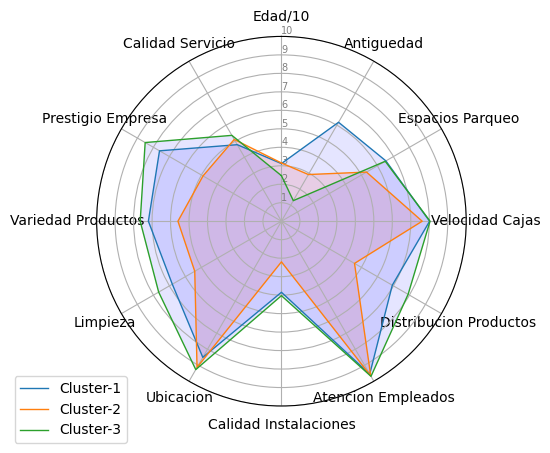

In [98]:
# RADAR PLOT para interpretar
# ===========================

datos
centros
centros_trans = centros.T
centros_trans

df = pd.DataFrame()
for i in range(datos.shape[1]):
    df = pd.concat([df,pd.DataFrame({datos.columns[i]:centros_trans[i,:].tolist()})],axis = 1)

df =  pd.concat([df,pd.DataFrame({'grupo': ['Cluster-1','Cluster-2','Cluster-3']})],axis = 1)
print(df)

# Variables y Número de Variables
variables = list(df)[0:12]
variables
N = len(variables)
print(N)
 
# Ángulo de los ejes 
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos+= angulos[:1]
 
# Inicializa el Radar
ax = plt.subplot(111, polar=True)
 
# En primer eje en la parte de arriba
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Dibuja los ejes por variables + las etiquetas
null=plt.xticks(angulos[:-1], variables)
 
# Dibuja las etiquetas en Y
ax.set_rlabel_position(0)
null=plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="grey", size=7)
plt.ylim(0,10)
 
# Plotea cada cluster (grupo) = una línea de datos
 
# Cluster 1
valores=df.loc[0].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-1")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Cluster 2
valores=df.loc[1].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-2")
ax.fill(angulos, valores, 'r', alpha=0.1)
 
# Cluster 3
valores=df.loc[2].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-3")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Agrega la leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
plt.close()


array([[-2.29713786, -1.0440986 ],
       [-3.67955322, -1.96190882],
       [-0.62772032,  4.64231098],
       [ 1.0132489 , -5.21164881],
       [ 9.6383012 , -1.77660147],
       [ 2.69029011, -1.06384576],
       [-3.33779804, -1.8576653 ],
       [ 1.25061775,  0.34179433],
       [ 3.41296888, -1.80612147],
       [-3.256672  , -1.68846677],
       [ 5.01277194,  7.55924114],
       [ 0.45713703,  2.00890385],
       [-4.31444668, -1.1532299 ],
       [-0.77814906,  2.71798916],
       [ 2.03613873,  1.03552109],
       [ 1.76558006,  0.01137745],
       [ 1.02227888,  1.59870929],
       [-3.14165189,  2.88770514],
       [-5.2959146 ,  0.4575491 ],
       [ 3.03594357, -0.8969674 ],
       [-1.40718438,  3.11033148],
       [ 5.15684301, -1.01284596],
       [-0.50563026, -2.36536284],
       [ 0.12202622, -4.53423404],
       [ 2.63071112, -1.92036543],
       [ 1.12329306,  2.55134427],
       [ 1.08623432, -4.6862166 ],
       [-3.38481021, -1.52501917],
       [-1.608607  ,

(37, 12)
(37, 2)


Text(0.5, 0, 'componente 1')

Text(0, 0.5, 'componente 2')

Text(0.5, 1.0, '3 Cluster K-Medias')

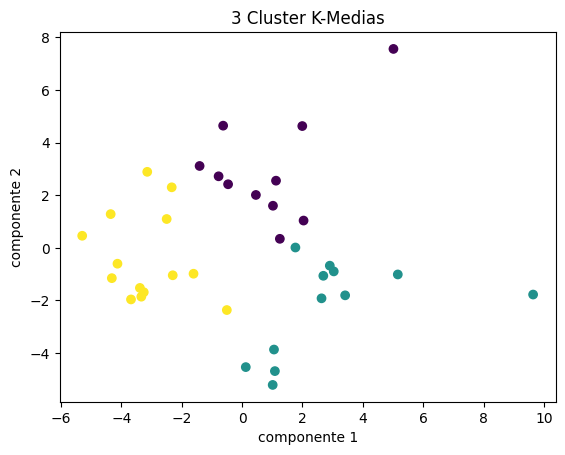

In [99]:

# Los dibuja sobre el plano principal los clusters de k-medias
pca = PCA(n_components=2)
componentes = pca.fit_transform(datos)
componentes
print(datos.shape)
print(componentes.shape)
plt.scatter(componentes[:, 0], componentes[:, 1],c=kmedias.predict(datos))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('3 Cluster K-Medias')
plt.show()


## Clusterización Jerárquica

### Método de Agrupación Jerárquica

Para comprender el método se deben analizar sub-criterios que permiten establecer la manera de agrupación de un conjunto de datos.

#### Agrupación Jerárquica Aglomerativa

Conocido como “Clusterización Jerárquica”, el enfoque aglomerativo o enfoque ascendente considera cada dato (muestra) como si se tratara como un solo clúster y luego se fusionan o aglomeran por pares en forma sucesiva hasta que todos los clústeres se hayan fusionado en uno solo. La agrupación parte de determinado nivel de agrupamiento y criterios que veremos a continuación.

En esta técnica, inicialmente cada punto de datos se considera como un clúster individual. En cada iteración, los grupos similares se fusionan con otros grupos hasta que se forma un grupo o grupos K.

El algoritmo básico de algomeración consiste en:

1. Calcular la matriz de proximidad
2. Dejar que cada punto de datos sea un clúster
3. Repetir: fusionar los dos clústeres más cercanos y actualizar la matriz de proximidad
4. Hasta que solo quede un único clúster
5. La operación clave es el cálculo de la proximidad de dos clústeres.

#### Agrupación Jerárquica Divisiva

En un agrupamiento divisivo (esta vez de arriba hacia abajo), un incia con un solo clúster de todas las muestras sque se va dividiendo recursivamente en dos clústeres (al menos similares) hasta que haya un clúster para cada observación. A la inversa del método anterior.

Esta técnica no se usa tanto que la anterior, se consideran todos los puntos de datos como un único clúster:

1. En cada iteración, se separan los puntos de datos del clúster que no son similares.
2. Cada punto de datos que se separa se considera como un clúster individual.
3. Al final, quedan n grupos.

Se le llama se le llama agrupamiento jerárquico divisiva ya que se hace repetidamente la división hasta obtener n clústeres,

#### Agrupación Jerárquica.
El objetivo es combinar repetidamente dos clústers cercanos (de nuevo el criterio de distancia es euclidiana por omisión pero podría ser otro acorde al tipo de tipos) en un clúster más grande.

El algoritmo es el siguiente:

1. Se comienza calculando la distancia entre cada par de puntos de observación y se almacena en una matriz de distancia.
2. Se coloca cada punto en su propio grupo (inicialmente todos individuales).
3. Luego se comienza a fusionar los pares de puntos más cercanos con base en las distancias de la matriz de distancia.
4. Como resultado la cantidad de clústeres disminuye en 1.
5. Se recompila la distancia entre el nuevo clúster y los antiguos y los almacena en una nueva matriz de distancia.
6. Se Se repiten los pasos 2 y 3 hasta que todos los clústeres se fusionan en uno solo.

##### Los métodos de cálculo de distancia permiten 5 tipos de formas algorítmicas.

- *Enlace completo*: 
    - Se calculan las distancias máximas entre clústers antes de la fusión.
- *Enlace simple*: 
    - Se calculan las distancias mínima entre elementos de cada clúster antes de la fusión. Permite ubicar valores atípicos.
- *Enlace promedio*: 
    - Se calculan la distancia completa pero se usa la distancia media entre los pares del clúster.
- *Método centroide*:  
    - Se localiza el centroide de cada clúster y luego se calcula la distancia entre los centroides antes de fucionarlos.
- *Método Ward*: 
    - En este método se consideran todos los clústeres y el algoritmo calcula la suma de las distancias cuadradas dentro de los clústeres y las fusiona para minimizarlas.

Desde un punto de vista estadística, el proceso de aglomeración conduce a una reducción de la varianza de cada clúster resultante.

**Cúal método usar?**

La elección del método vinculación depende totalmente cada quien y no hay un método rápido y robusto que siempre dé buenos resultados. Diferentes métodos de vinculación conducen a diferentes clústering.

**Criterios de distancia**

Cómo se indicó anteriormente el criterio de “distancia” es habitualmente euclidiana pero se pueden usar otros criterios dependiendo de la caracterizacón de los datos.

Existen al menos 4 que son utilizados los más utilizados.

- *Distancia euclidiana:*
    - Es la distancia ordinaria en línea recta entre dos puntos en el espacio euclidiano. Con esta distancia, el espacio euclidiano se convierte en un espacio métrico.

- *Distancia Manhatan:*
    - Es similar a la euclidiana, con la condición que la distancia se calcula sumando el valor absoluto de la diferencia entre las dimensiones. Por ejemplo, la distancia de Manhattan implica moverse en línea recta, primero a lo lardo de un eje y luego junto con el otro.

- *Distancia coseno:*
    - Toma en cuenta la forma de las variables, más que sus valores. Tiende a asociar observaciones que tienen las mismas variables máxima  y mínima, independientemente de su valor efectivo.


### Videos:
1. [Introducción Dendogramas y clusterization Jerárquica](https://www.youtube.com/watch?v=ijUMKMC4f9I&ab_channel=365DataScience)

2. [Construcción de dendogramas](https://youtu.be/QXOkPvFM6NU?t=694)

3. [Otro descripcion y ejemplo más avanzado clusterization Jerárquica](https://www.youtube.com/watch?v=7xHsRkOdVwo&ab_channel=StatQuestwithJoshStarmer)

Para ejemplizar el método el siguiente segmento de código en Python muestra el contexto de Clusterización Jerárquica.

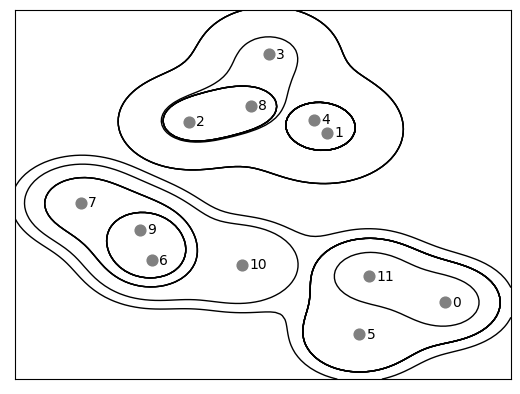

In [100]:

## Clusterización Jerárquica

# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward, single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist

# f cluster para los centros

# Simulación del clustering jeráquico
mglearn.plots.plot_agglomerative()
plt.show()
plt.close()


          X1        X2         X3
0   0.180614  0.131432   4.705366
1   1.146194  1.558149   2.778408
2   2.432693  0.960464   3.067147
3   0.409572  4.061638   3.569659
4   2.242389  3.797911   4.600468
5   1.555621  7.468936  10.392967
6   0.643213  4.351152   3.518008
7   0.707008  1.078266   1.925452
8   1.727676  8.146824   8.497235
9   1.706178  8.260853   9.245284
10  0.188137  0.887168   2.532019
11  0.328146  1.351517   2.455377
12  0.121901  0.531193   0.984677
13  0.794688  5.713992   1.680796
14  2.057082  4.788099   2.634408
15  1.009709  4.984355   0.491771
16  0.227734  8.482240   8.908921
17  1.474195  6.180889   8.633533
18  1.927033  7.481832   8.532508
19  1.251468  3.343033   2.432194
[1 1 1 0 0 2 0 1 2 2 1 1 1 0 0 0 2 2 2 0]


<Figure size 1300x1000 with 0 Axes>

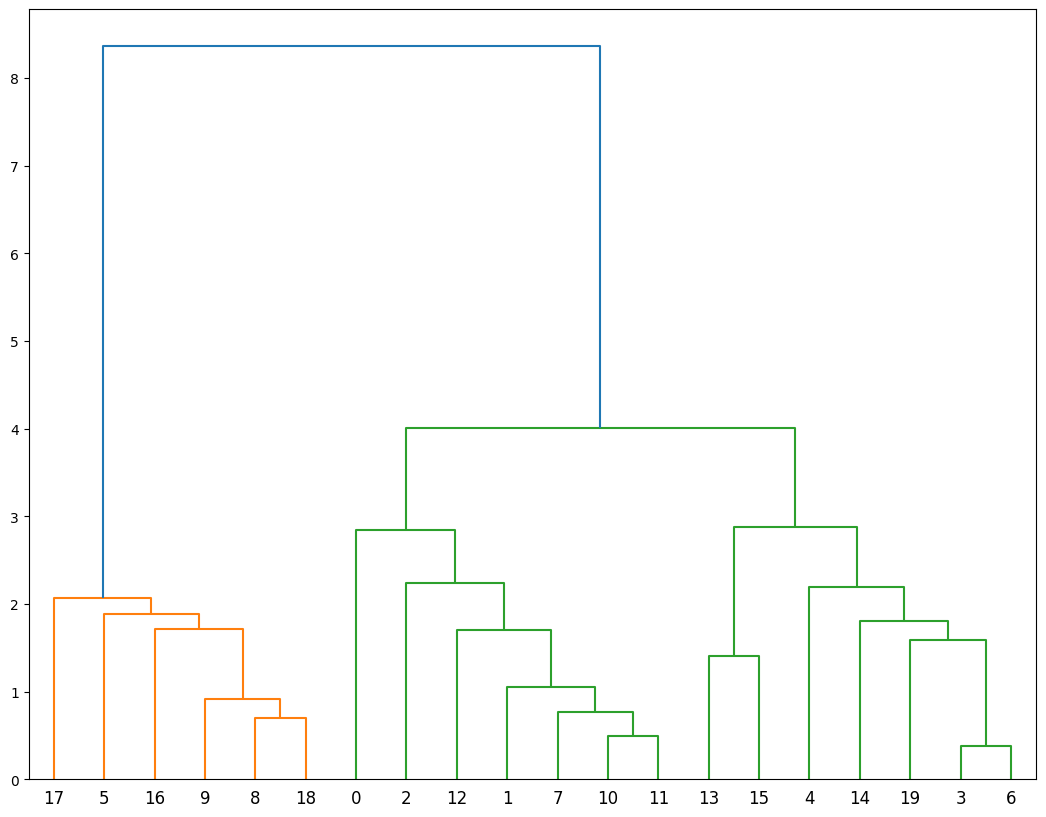

In [101]:

# Ejemplo 1. Datos simulados con dos variables 
X, y = make_blobs(random_state=0, n_samples=20, n_features = 3)
X = pd.DataFrame(X).abs()
X.columns = ["X1","X2","X3"]
print(X)
print(y)

# Agregación de:
ward_res = ward(X)         #Ward
single_res = single(X)     #Salto mínimo
complete_res = complete(X) #Salto Máximo
average_res = average(X)   #Promedio

# Plotea el dendograma
plt.figure(figsize=(13,10))
null=dendrogram(average_res)
plt.show()
plt.close()


<Figure size 1300x1000 with 0 Axes>

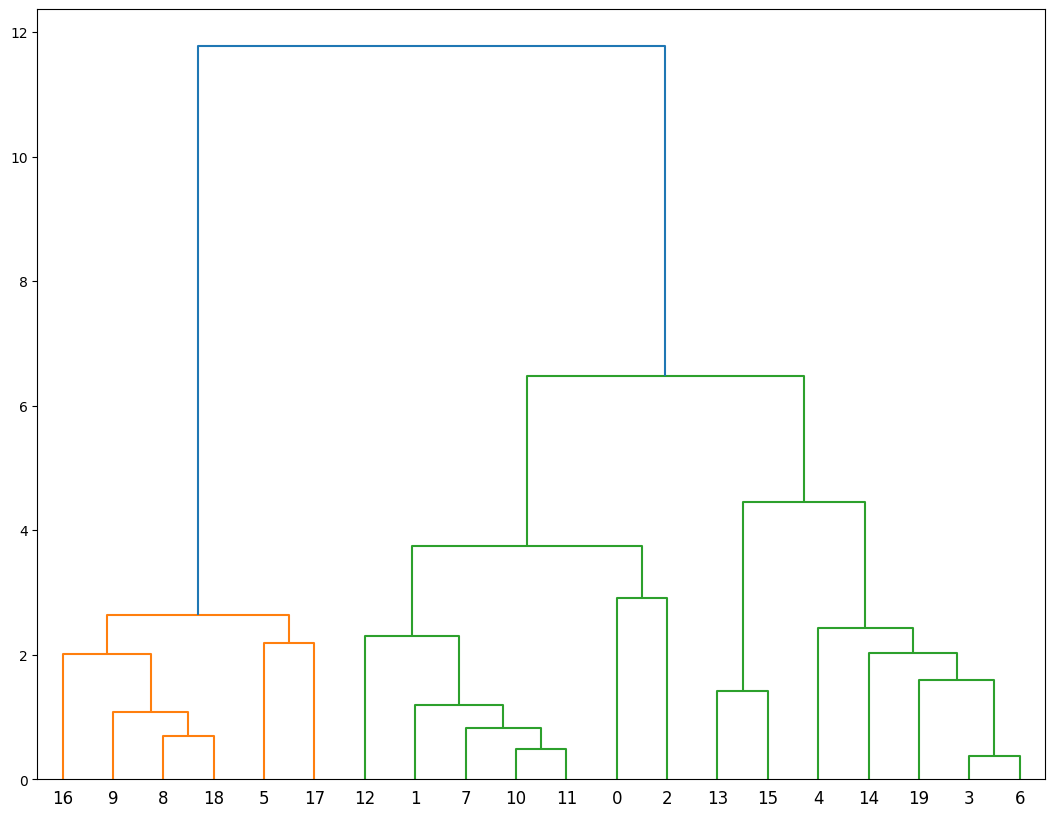

<Figure size 1300x1000 with 0 Axes>

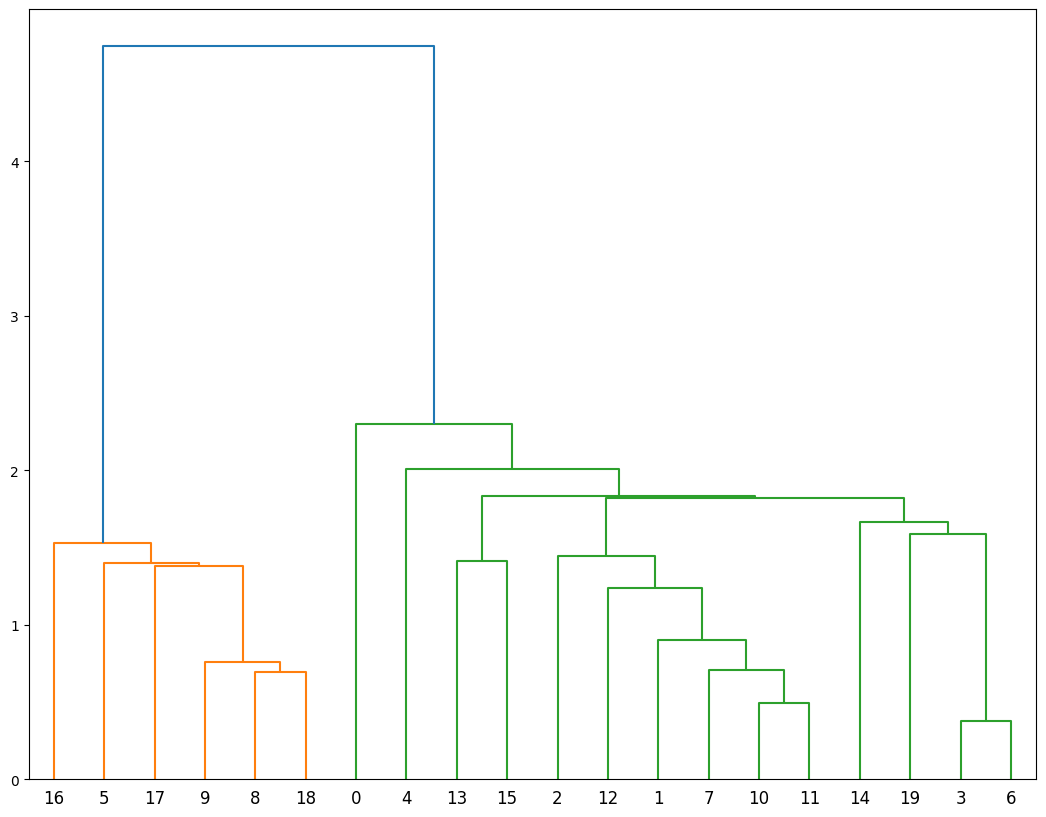

<Figure size 1300x1000 with 0 Axes>

In [102]:

plt.figure(figsize=(13,10))
null=dendrogram(complete_res)
plt.show()
plt.close()


plt.figure(figsize=(13,10))
null=dendrogram(single_res)
plt.show()
plt.close()

plt.figure(figsize=(13,10))
d = dendrogram(ward_res)



Text(200.0, 15.5, ' dos clústeres')

Text(200.0, 5, ' tres clústeres')

Text(0.5, 0, 'Orden en el eje X')

Text(0, 0.5, 'Distancia o Agregación')

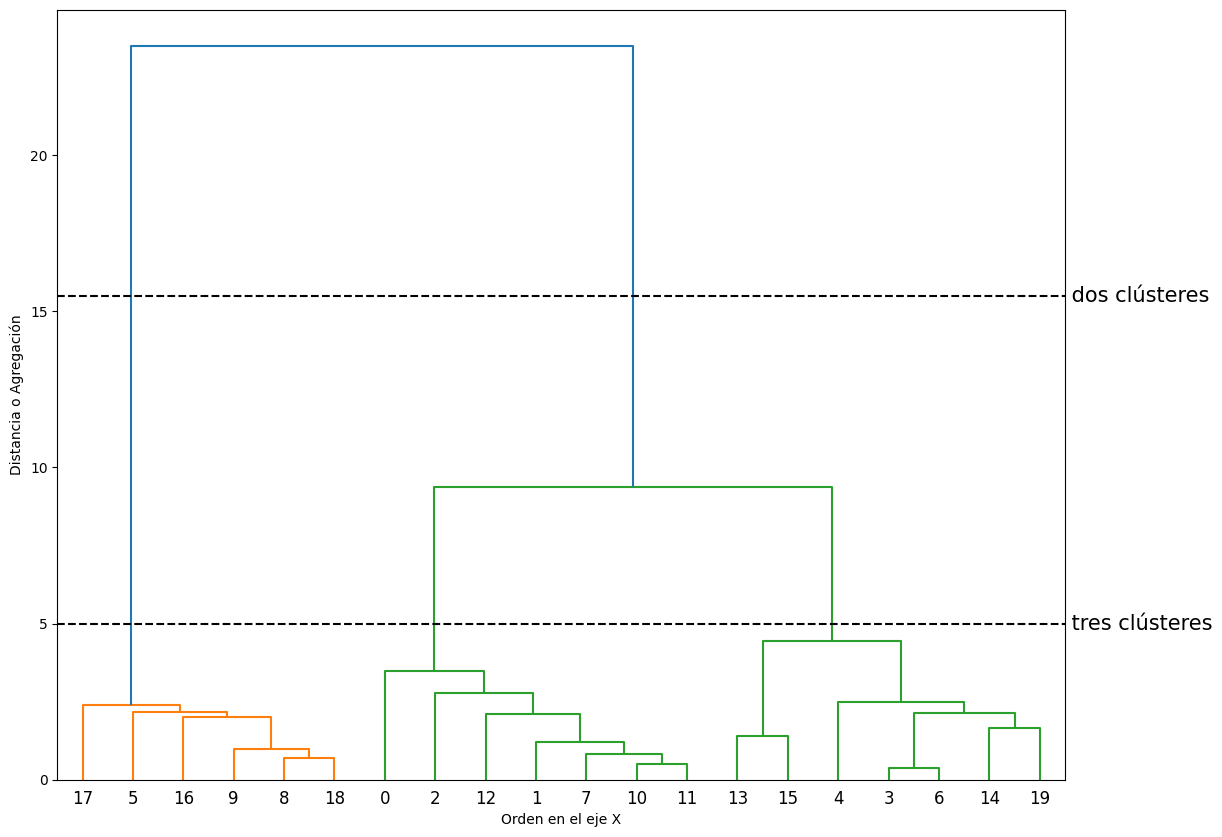

In [103]:

# Agrega cortes con 2 y 3 clústeres
ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [15.5, 15.5], '--', c='k')
ax.plot(limites, [5, 5], '--', c='k')

ax.text(limites[1], 15.5, ' dos clústeres', va='center', fontdict={'size': 15})
ax.text(limites[1], 5, ' tres clústeres', va='center', fontdict={'size': 15})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")
plt.show()
plt.close()


<Figure size 1800x800 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

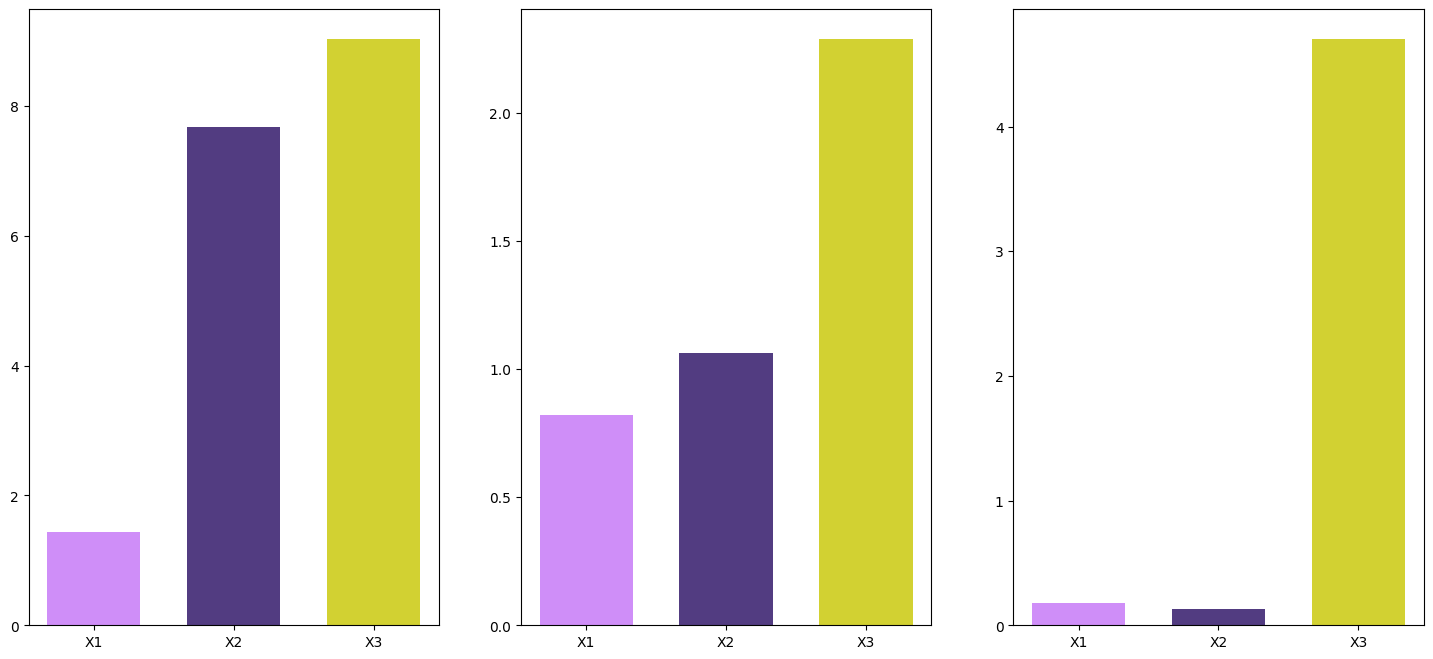

In [104]:

# Gráficos de barras : 
def centroide(num_cluster, datos, clusters):
  ind = clusters == num_cluster
  return(pd.DataFrame(datos[ind].mean()).T)

grupos = fcluster(linkage(pdist(X), method='ward'),3,'distance')
centros = np.array(pd.concat([centroide(1,X,grupos),centroide(2,X,grupos),centroide(3,X,grupos)]))


colores_1 = ['#CF8EF8', '#523C81', '#D2D132', '#59C951', '#E5826C']
plt.figure(1,figsize=(18,8))
# Plotea Centro 1
plt.subplot(1, 3, 1)
y  = centros[:1, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(X.shape[1]), X.columns)
# Plotea Centro 2
plt.subplot(1, 3, 2)
y= centros[1:2, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(X.shape[1]), X.columns)
# Plotea Centro 3
plt.subplot(1, 3, 3)
y= centros[2:3, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(X.shape[1]), X.columns)
plt.show()
plt.close()


array([[1.43640617, 0.8206799 , 0.18061434],
       [7.67026242, 1.06112633, 0.13143174],
       [9.03507453, 2.29051355, 4.70536631]])

         X1        X2        X3      grupo
0  1.436406  7.670262  9.035075  Cluster-1
1  0.820680  1.061126  2.290514  Cluster-2
2  0.180614  0.131432  4.705366  Cluster-3


['X1', 'X2', 'X3']

3


(0.0, 10.0)

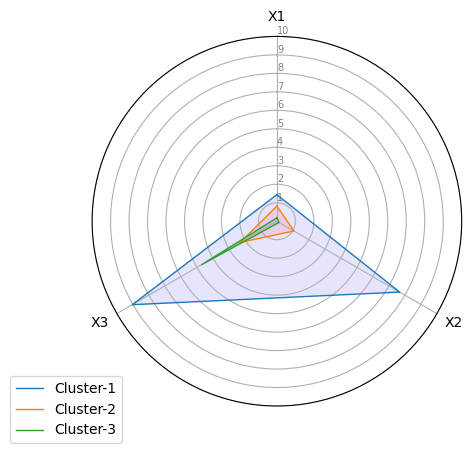

In [105]:
# RADAR PLOT para interpretar
# ===========================
centros_trans = centros.T
centros_trans

df = pd.DataFrame()
for i in range(X.shape[1]):
    df = pd.concat([df,pd.DataFrame({X.columns[i]:centros_trans[i,:].tolist()})],axis = 1)

df =  pd.concat([df,pd.DataFrame({'grupo': ['Cluster-1','Cluster-2','Cluster-3']})],axis = 1)
print(df)

# Variables y Número de Variables
variables=list(df)[0:3]
variables
N = len(variables)
print(N)
 
# Ángulo de los ejes 
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos+= angulos[:1]
 
# Inicializa el Radar
ax = plt.subplot(111, polar=True)
 
# En primer eje en la parte de arriba
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Dibuja los ejes por variables + las etiquetas
null=plt.xticks(angulos[:-1], variables)
 
# Dibuja las etiquetas en Y
ax.set_rlabel_position(0)
null=plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="grey", size=7)
plt.ylim(0,10)
 
# Plotea cada cluster (grupo) = una línea de datos
 
# Cluster 1
valores=df.loc[0].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-1")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Cluster 2
valores=df.loc[1].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-2")
ax.fill(angulos, valores, 'r', alpha=0.1)
 
# Cluster 3
valores=df.loc[2].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-3")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Agrega la leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
plt.close()


d:\Documents\UCR\IE-0217 Estructura de Datos y Algorithmos para Ingenieria\Modules\Semana14\Clase28\MaterialClase\src\pyModulo12
        Matematicas  Ciencias  Espanol  Historia  EdFisica
Lucia           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Ines            7.6       9.2      8.0       8.0       7.5
Luis            5.0       6.5      6.5       7.0       9.0
Andres          6.0       6.0      7.8       8.9       7.3
Ana             7.8       9.6      7.7       8.0       6.5
Carlos          6.3       6.4      8.2       9.0       7.2
Jose            7.9       9.7      7.5       8.0       6.0
Sonia           6.0       6.0      6.5       5.5       8.7
Maria           6.8       7.2      8.7       9.0       7.0
        Matematicas  Ciencias  Espanol  Historia  EdFisica
Lucia           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Ines            7.6       9.2      8.0       

<Figure size 1300x1000 with 0 Axes>

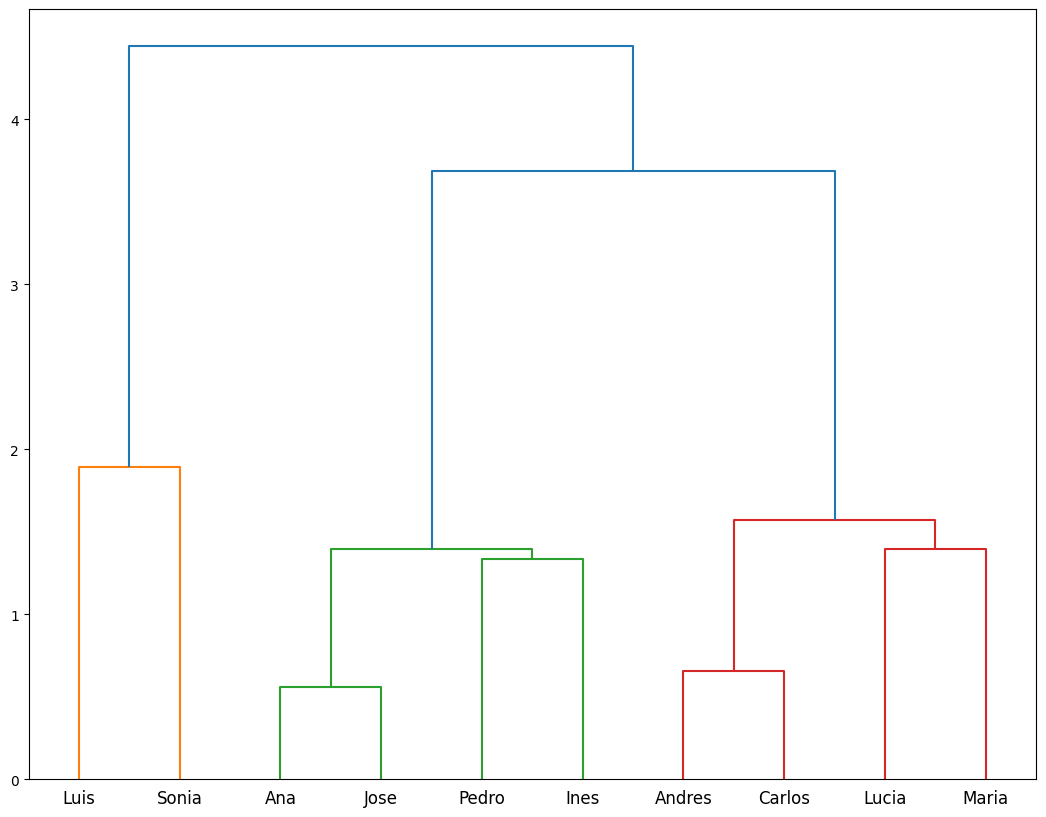

<Figure size 1300x1000 with 0 Axes>

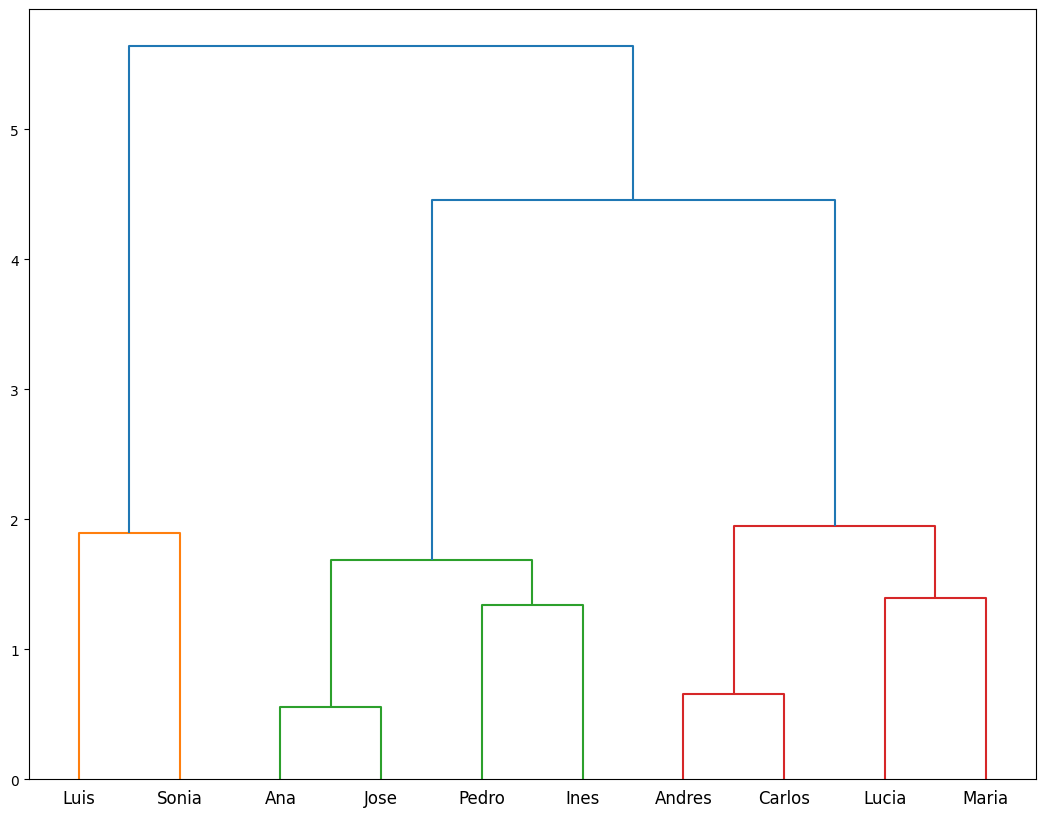

<Figure size 1300x1000 with 0 Axes>

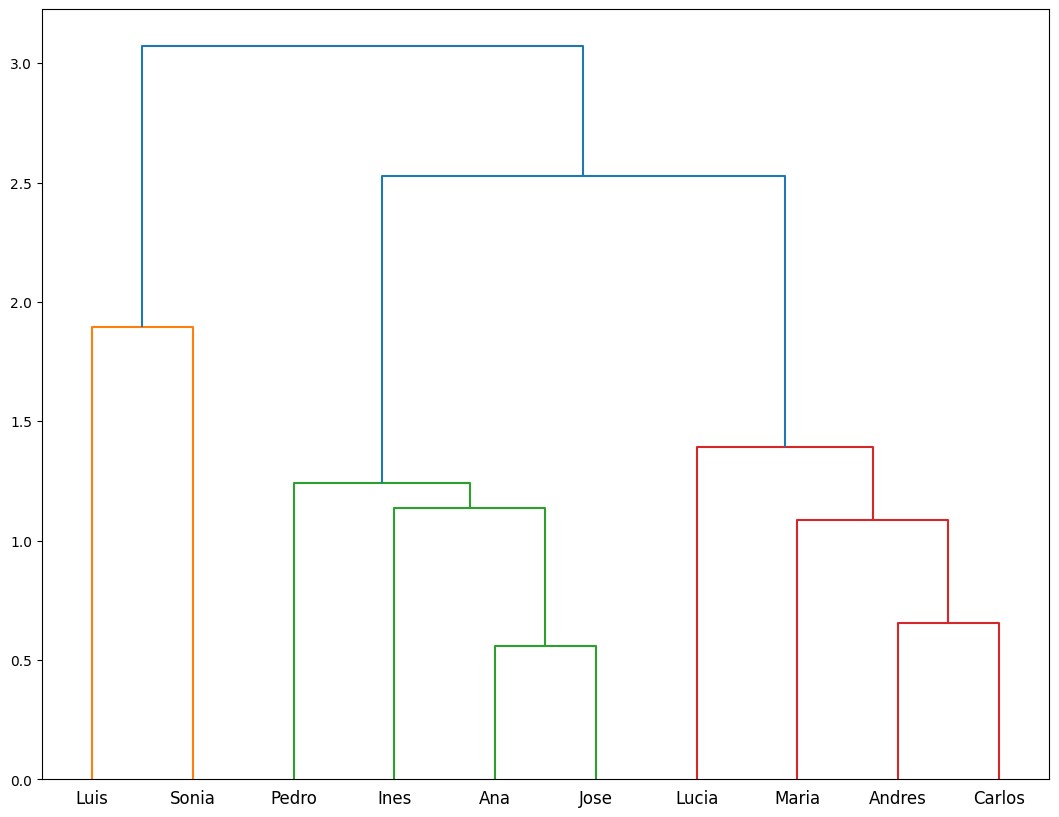

<Figure size 1300x1000 with 0 Axes>

Text(100.0, 7.25, ' dos clústeres')

Text(100.0, 4, ' tres clústeres')

Text(0.5, 0, 'Orden en el eje X')

Text(0, 0.5, 'Distancia o Agregación')

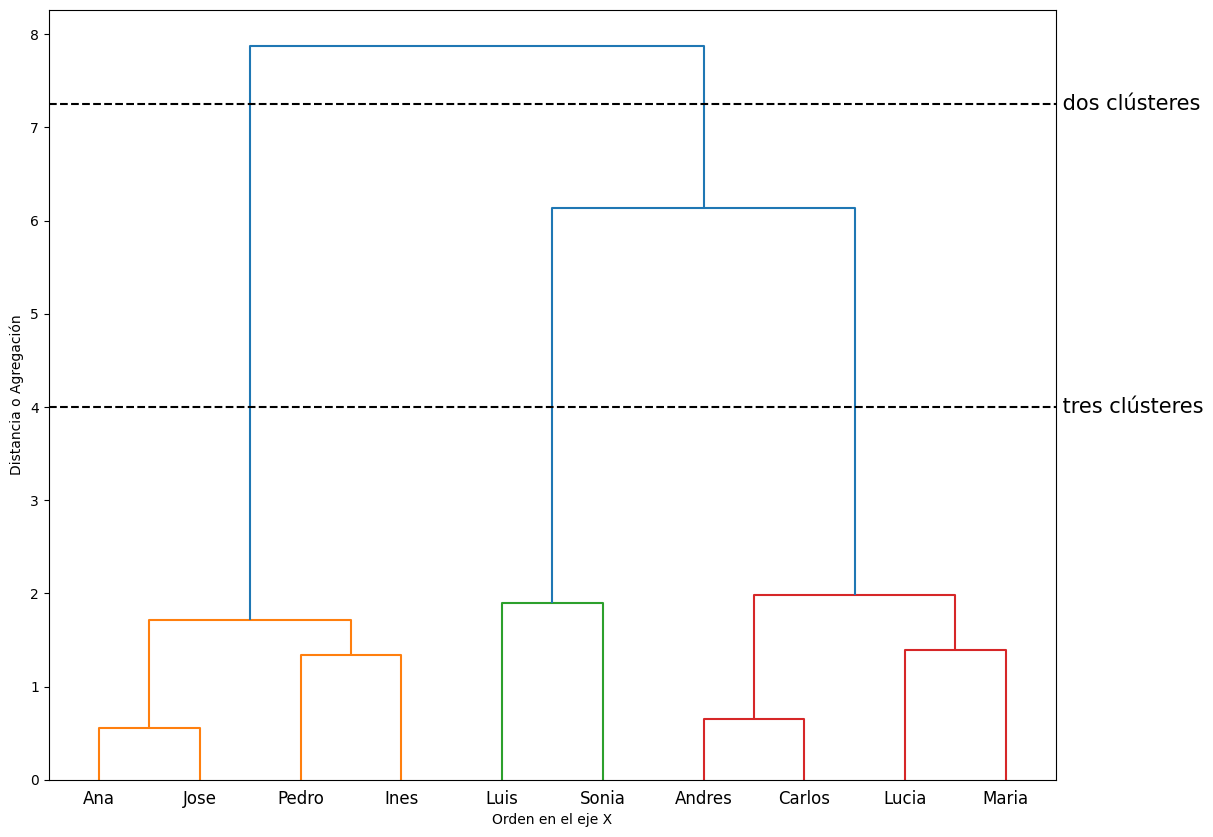

In [106]:

# Ejemplo 2. Datos de Estudiantes

print(os.getcwd())
datos = pd.read_csv('../Datos/EjemploEstudiantes.csv',delimiter=';',decimal=",",index_col=0)
print(datos)
print(datos.head())
print(datos.shape)

# Agregación de:
ward_res = ward(datos)         #Ward
single_res = single(datos)     #Salto mínimo
complete_res = complete(datos) #Salto Máximo
average_res = average(datos)   #Promedio

# Plotea el dendograma
plt.figure(figsize=(13,10))

null=dendrogram(average_res,labels= datos.index.tolist())
plt.show()
plt.close()

plt.figure(figsize=(13,10))
null=dendrogram(complete_res,labels= datos.index.tolist())
plt.show()
plt.close()

plt.figure(figsize=(13,10))
null=dendrogram(single_res,labels= datos.index.tolist())
plt.show()
plt.close()

plt.figure(figsize=(13,10))
null=dendrogram(ward_res,labels= datos.index.tolist())

# Agrega cortes con 2 y 3 clústeres
ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [7.25, 7.25], '--', c='k')
ax.plot(limites, [4, 4], '--', c='k')

ax.text(limites[1], 7.25, ' dos clústeres', va='center', fontdict={'size': 15})
ax.text(limites[1], 4, ' tres clústeres', va='center', fontdict={'size': 15})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")
plt.show()
plt.close()


<Figure size 1800x800 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

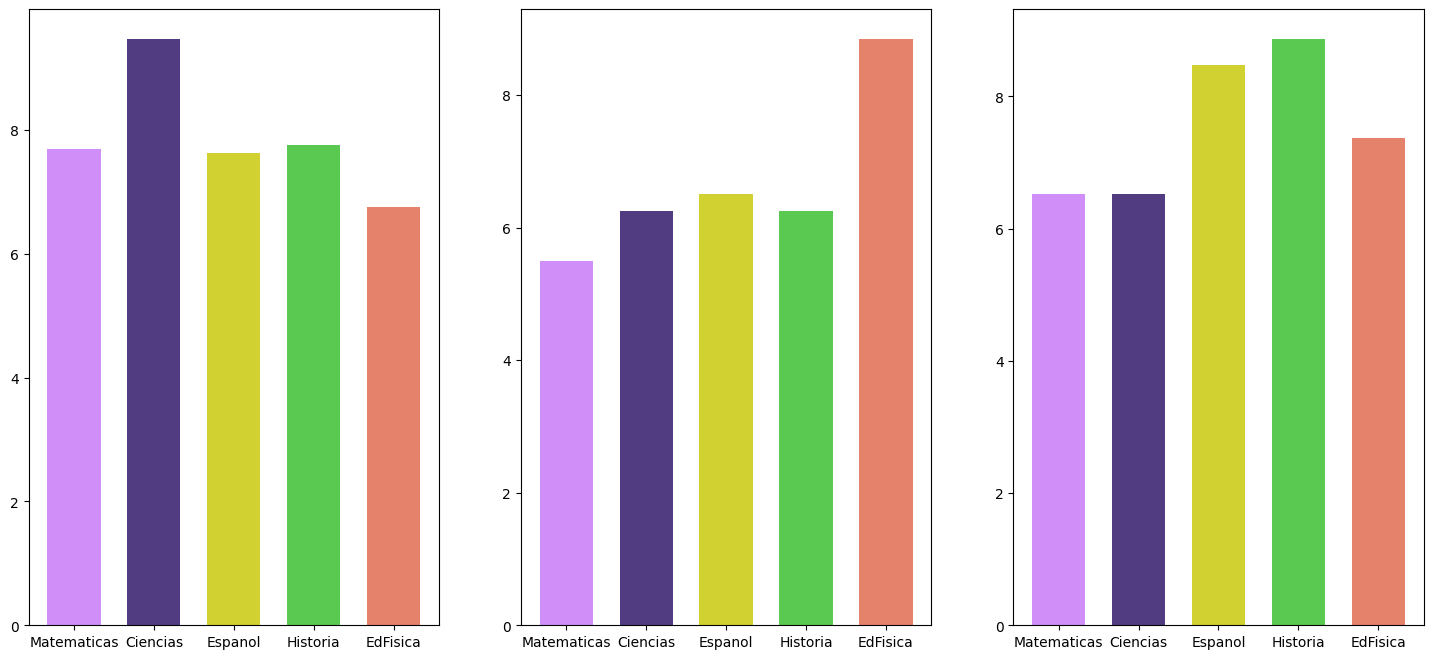

In [107]:

# Gráficos de barras : 
grupos = fcluster(linkage(pdist(datos), method='ward'),3,'distance')
centros = np.array(pd.concat([centroide(1,datos,grupos),centroide(2,datos,grupos),centroide(3,datos,grupos)]))

colores_1 = ['#CF8EF8', '#523C81', '#D2D132', '#59C951', '#E5826C']
# Plotea Centro 1
plt.figure(1,figsize=(18,8))
plt.subplot(1, 3, 1)
y  = centros[:1,:].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)

# Plotea Centro 2
plt.subplot(1, 3, 2)
y= centros[1:2, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)

# Plotea Centro 3
plt.subplot(1, 3, 3)
y = centros[2:3, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
plt.show()
plt.close()


array([[7.7  , 5.5  , 6.525],
       [9.475, 6.25 , 6.525],
       [7.625, 6.5  , 8.475],
       [7.75 , 6.25 , 8.875],
       [6.75 , 8.85 , 7.375]])

   Matematicas  Ciencias  Espanol  Historia  EdFisica      grupo
0        7.700     9.475    7.625     7.750     6.750  Cluster-1
1        5.500     6.250    6.500     6.250     8.850  Cluster-2
2        6.525     6.525    8.475     8.875     7.375  Cluster-3


['Matematicas', 'Ciencias', 'Espanol', 'Historia', 'EdFisica']

5


(0.0, 10.0)

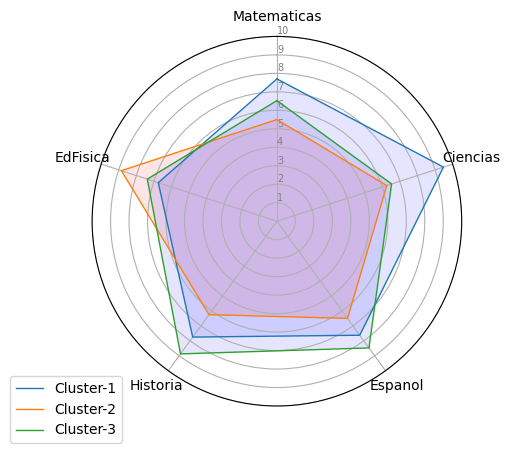

In [108]:

# RADAR PLOT para interpretar
# ===========================
centros_trans = centros.T
centros_trans

df = pd.DataFrame()
for i in range(datos.shape[1]):
    df = pd.concat([df,pd.DataFrame({datos.columns[i]:centros_trans[i,:].tolist()})],axis = 1)

df =  pd.concat([df,pd.DataFrame({'grupo': ['Cluster-1','Cluster-2','Cluster-3']})],axis = 1)
print(df)

# Variables y Número de Variables
variables=list(df)[0:5]
variables
N = len(variables)
print(N)
 
# Ángulo de los ejes 
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos+= angulos[:1]
 
# Inicializa el Radar
ax = plt.subplot(111, polar=True)
 
# En primer eje en la parte de arriba
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Dibuja los ejes por variables + las etiquetas
null=plt.xticks(angulos[:-1], variables)
 
# Dibuja las etiquetas en Y
ax.set_rlabel_position(0)
null=plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="grey", size=7)
plt.ylim(0,10)
 
# Plotea cada cluster (grupo) = una línea de datos
 
# Cluster 1
valores=df.loc[0].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-1")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Cluster 2
valores=df.loc[1].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-2")
ax.fill(angulos, valores, 'r', alpha=0.1)
 
# Cluster 3
valores=df.loc[2].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-3")
ax.fill(angulos, valores, 'b', alpha=0.1)
 
# Agrega la leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
plt.close()


In [ ]:
##_______________________________________________________________________________________

# Ejemplo Iris

datos = pd.read_csv('../Datos/iris.csv',delimiter=';',decimal=".")
datos = datos.iloc[:,:4] #Elimina la variable categorica
print(datos)

print(datos.head())
print(datos.shape)
ward_res = ward(datos)         #Ward
single_res = single(datos)     #Salto mínimo
complete_res = complete(datos) #Salto Máximo
average_res = average(datos)   #Promedio

null=dendrogram(average_res,labels= datos.index.tolist(),color_threshold=1.9,leaf_rotation=90)
plt.show()
plt.close()

plt.figure(figsize=(13,10))
null=dendrogram(complete_res,labels= datos.index.tolist(),color_threshold=3.5,leaf_rotation=90)
plt.show()
plt.close()

plt.figure(figsize=(13,10))
null=dendrogram(single_res,labels= datos.index.tolist(),color_threshold=0.7,leaf_rotation=90)
plt.show()
plt.close()


In [ ]:
## Agregando cortes en el dendograma
plt.figure(figsize=(13,10))
null=dendrogram(ward_res,labels= datos.index.tolist(),color_threshold=8,leaf_rotation=90)

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [20, 20], '--', c='k')
ax.plot(limites, [8, 8], '--', c='k')

ax.text(limites[1], 20, ' dos clústeres', va='center', fontdict={'size': 15})
ax.text(limites[1], 8, ' tres clústeres', va='center', fontdict={'size': 15})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")
plt.show()
plt.close()


In [ ]:
grupos = fcluster(linkage(pdist(datos), method='ward'),3,criterion='maxclust')
print(grupos)
centros = np.array(pd.concat([centroide(1,datos,grupos),centroide(2,datos,grupos),centroide(3,datos,grupos)]))
print(centros)
colores_1 = ['#CF8EF8', '#523C81', '#D2D132', '#59C951', '#E5826C']
# Plotea Centro 1
plt.figure(1,figsize=(18,8))
plt.subplot(1, 3, 1)
y  = centros[:1,:].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
# Plotea Centro 2
plt.subplot(1, 3, 2)
y= centros[1:2, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
# Plotea Centro 3
plt.subplot(1, 3, 3)
y = centros[2:3, :].tolist()[0]
null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
null=plt.xticks(range(datos.shape[1]), datos.columns)
plt.show()
plt.close()


In [ ]:
##Radar Plot
centros_trans = centros.T
print(centros_trans)

df = pd.DataFrame()
for i in range(datos.shape[1]):
    df = pd.concat([df,pd.DataFrame({datos.columns[i]:centros_trans[i,:].tolist()})],axis = 1)
df =  pd.concat([df,pd.DataFrame({'grupo': ['Cluster-1','Cluster-2','Cluster-3']})],axis = 1)
print(df)

variables=list(df)[0:4]
print(variables)

N = len(variables)
print(N)

## Angulo de ejes
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos+= angulos[:1]
ax = plt.subplot(111, polar=True)
#Eeje a 90 grados
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

null=plt.xticks(angulos[:-1], variables)
ax.set_rlabel_position(0)
null=plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="grey", size=7)
plt.ylim(0,10)

#Graficando cada cluster (grupo) = una línea de datos
#Cluster 1
valores=df.loc[0].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-1")
ax.fill(angulos, valores, 'b', alpha=0.1)

#Cluster 2
valores=df.loc[1].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-2")
ax.fill(angulos, valores, 'r', alpha=0.1)

#Cluster 3
valores=df.loc[2].drop('grupo').values.flatten().tolist()
valores += valores[:1]
ax.plot(angulos, valores, linewidth=1, linestyle='solid', label="Cluster-3")
ax.fill(angulos, valores, 'b', alpha=0.1)

#Plot
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
plt.close()


In [ ]:
###_______________________________________________________________________

datos = pd.read_csv('../Datos/EjemploClientesCorregidaEdad.csv',delimiter=';',decimal=",",index_col=0)
print(datos)

print(datos.head())
print(datos.shape)
ward_res = ward(datos)         #Ward
single_res = single(datos)     #Salto mínimo
complete_res = complete(datos) #Salto Máximo
average_res = average(datos)   #Promedio

null=dendrogram(average_res,labels= datos.index.tolist(),color_threshold=9.8)
plt.show()
plt.close()

plt.figure(figsize=(13,10))
null=dendrogram(complete_res,labels= datos.index.tolist(),color_threshold=13)
plt.show()
plt.close()

plt.figure(figsize=(13,10))
null=dendrogram(single_res,labels= datos.index.tolist(),color_threshold=6.5)
plt.show()
plt.close()


In [ ]:

## Con divisiones
plt.figure(figsize=(13,10))
null=dendrogram(ward_res,labels= datos.index.tolist(),color_threshold=15)
  
ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [20, 20], '--', c='k')
ax.plot(limites, [15, 15], '--', c='k')
ax.plot(limites, [12.5, 12.5], '--', c='k')

ax.text(limites[1], 20, ' dos clústeres', va='center', fontdict={'size': 15})
ax.text(limites[1], 15, ' tres clústeres', va='center', fontdict={'size': 15})
ax.text(limites[1], 12.5, ' cinco clústeres', va='center', fontdict={'size': 15})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")
plt.show()
plt.close()


In [ ]:

numero_clusters = 3
grupos = fcluster(linkage(pdist(datos), method='ward'),numero_clusters,criterion='maxclust')
print(grupos)

centro_lista = []
centros = np.array(pd.concat([centroide(i+1,datos,grupos) for i in range(numero_clusters)]))
print(centros)

colores_1 = ['#C4F6C2','#F3864B', '#AF960F','#F124A3','#FEF61E','#10855C',
             '#441308','#4C19BE','#E74D50','#45DC46','#AA27B6','#2B757E']
# Otra manera:
plt.figure(1,figsize=(25,20))
for i in range(numero_clusters):
    null=plt.subplot(numero_clusters, 1, i+1)
    min_limit = i
    max_limit = i+1
    y  = centros[min_limit:max_limit,:].tolist()[0]
    null=plt.bar(range(len(y)), y, 1/1.5, color=colores_1)
    null=null=plt.xticks(range(datos.shape[1]), datos.columns,rotation=30,fontsize=10)
plt.show()
plt.close()


In [ ]:

## RADAR PLOT
centros_trans = centros.T
print(centros_trans)

nombres =  ["Cluster-%i" % (i+1) for i in range(numero_clusters)]
print(nombres)

df = pd.DataFrame()
for i in range(datos.shape[1]):
    df = pd.concat([df,pd.DataFrame({datos.columns[i]:centros_trans[i,:].tolist()})],axis = 1)
df =  pd.concat([df,pd.DataFrame({'grupo': nombres})],axis = 1)
print(df)

max_limit = df.shape[1] -1
variables=list(df)[0:max_limit]
print(variables)

N = len(variables)
print(N)

angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos+= angulos[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

null=null=plt.xticks(angulos[:-1], variables)

ax.set_rlabel_position(0)
null=plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="grey", size=7)
plt.ylim(0,10)

for i in range(numero_clusters):
  valores=df.loc[i].drop('grupo').values.flatten().tolist()
  valores += valores[:1]
  ax.plot(angulos, valores, linewidth=1, linestyle='solid', label=nombres[i])
  ax.fill(angulos, valores, 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
plt.close()
  


